# Credit Card Default Case
Submitted by:<br>
Subham Sarangi

### <font color='Blue'>Importing Libraries</font>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import os
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Dropout

from sklearn.model_selection import RandomizedSearchCV
from keras_tuner  import BayesianOptimization
from keras_tuner  import Hyperband

import seaborn as sn
%matplotlib inline
from sklearn import metrics

### <font color='Blue'>Loading Data</font>

In [2]:
data_df = pd.read_csv( "UCI_Credit_Card.csv" )
data_df.head(10)

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   
5   6    50000.0    1          1         2   37      0      0      0      0   
6   7   500000.0    1          1         2   29      0      0      0      0   
7   8   100000.0    2          2         2   23      0     -1     -1      0   
8   9   140000.0    2          3         1   28      0      0      2      0   
9  10    20000.0    1          3         2   35     -2     -2     -2     -2   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   
5  ...    19394.0    19619.0    20024.0    2500.0    1815.0     657.0   
6  ...   542653.0   483003.0   473944.0   55000.0   40000.0   38000.0   
7  ...      221.0     -159.0      567.0     380.0     601.0       0.0   
8  ...    12211.0    11793.0     3719.0    3329.0       0.0     432.0   
9  ...        0.0    13007.0    13912.0       0.0       0.0       0.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0       0.0                           1  
1    1000.0       0.0    2000.0                           1  
2    1000.0    1000.0    5000.0                           0  
3    1100.0    1069.0    1000.0                           0  
4    9000.0     689.0     679.0                           0  
5    1000.0    1000.0     800.0                           0  
6   20239.0   13750.0   13770.0                           0  
7     581.0    1687.0    1542.0                           0  
8    1000.0    1000.0    1000.0                           0  
9   13007.0    1122.0       0.0                           0  

[10 rows x 25 columns]

In [3]:
print("Default Credit Card Clients data -  rows:",data_df.shape[0]," columns:", data_df.shape[1])

Default Credit Card Clients data -  rows: 30000  columns: 25


In [4]:
print("Total number of elements in DataSet:",data_df.size)

Total number of elements in DataSet: 750000


### <font color='Blue'>1. Data Understanding</font>

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

Dataset contains 30000 records and 25 columns

There are few categorical columns which are inferred as objects

In [6]:
# The target default.payment.next.month is renamed def_pay to be short
# we can see that the repayment status is indicated in columns PAY_0, PAY_2 ... with no PAY_1 column, so we rename PAY_0 to PAY_1 for ease of understanding. 
data_df.rename(columns={'default.payment.next.month':'def_pay'}, inplace=True)
data_df.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [7]:
data_df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  def_pay  
0       0.0       0.0       0.0        1  
1    1000.0       0.0    2000.0        1  
2    1000.0    1000.0    5000.0        0  
3    1100.0    1069.0    1000.0        0  
4    9000.0     689.0     679.0        0  

[5 rows x 25 columns]

In [8]:
data_df.isna().sum()

#There is no missing data in the entire dataset.

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
def_pay      0
dtype: int64

In [9]:
total = data_df.isna().sum().sort_values(ascending = False)
percent = (data_df.isna().sum()/data_df.isna().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

ID  BILL_AMT2  PAY_AMT6  PAY_AMT5  PAY_AMT4  PAY_AMT3  PAY_AMT2  \
Total    0.0        0.0       0.0       0.0       0.0       0.0       0.0   
Percent  0.0        0.0       0.0       0.0       0.0       0.0       0.0   

         PAY_AMT1  BILL_AMT6  BILL_AMT5  ...  PAY_5  PAY_4  PAY_3  PAY_2  \
Total         0.0        0.0        0.0  ...    0.0    0.0    0.0    0.0   
Percent       0.0        0.0        0.0  ...    0.0    0.0    0.0    0.0   

         PAY_1  AGE  MARRIAGE  EDUCATION  SEX  def_pay  
Total      0.0  0.0       0.0        0.0  0.0      0.0  
Percent    0.0  0.0       0.0        0.0  0.0      0.0  

[2 rows x 25 columns]

### <font color='Blue'>2.  Data Preprocessing</font>

#### 2.1 Client Personal Information

Below we print the description of the client personal information features. The LIMIT_BAL, SEX, and AGE attributes seem to be consistent with the description provided earlier, while EDUCATION and MARRIAGE have some undocumented categories. EDUCATION ranges from 0 to 6, while MARRIAGE starts at category 0.

In [10]:
data_df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']].describe()

LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000
mean    167484.322667      1.603733      1.853133      1.551867     35.485500
std     129747.661567      0.489129      0.790349      0.521970      9.217904
min      10000.000000      1.000000      0.000000      0.000000     21.000000
25%      50000.000000      1.000000      1.000000      1.000000     28.000000
50%     140000.000000      2.000000      2.000000      2.000000     34.000000
75%     240000.000000      2.000000      2.000000      2.000000     41.000000
max    1000000.000000      2.000000      6.000000      3.000000     79.000000

In [11]:
data_df['EDUCATION'].value_counts().sort_index()

EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: count, dtype: int64

In [12]:
data_df['MARRIAGE'].value_counts().sort_index()

MARRIAGE
0       54
1    13659
2    15964
3      323
Name: count, dtype: int64

The presence of errors in the dataset can be addressed by correcting the wrong attribute, or by deleting the rows associated with the error. We could take a conservative approach and group the undocumented categories into others, but since anomalous entries are relatively few ($399$, $1.33\%$ of the total number), we decide to eliminate them.

In [13]:
# remove useless and incorrect information
print(f"Dataset size before:\t{data_df.shape[0]}")
data_df = data_df.drop(data_df[data_df['MARRIAGE']==0].index)
data_df['EDUCATION'] = np.where(data_df['EDUCATION']==0, 4, data_df['EDUCATION'])
data_df['EDUCATION'] = np.where(data_df['EDUCATION']==5, 4, data_df['EDUCATION'])
data_df['EDUCATION'] = np.where(data_df['EDUCATION']==6, 4, data_df['EDUCATION'])
data_df.reset_index(drop=True, inplace=True)
print(f"Dataset size after:\t{data_df.shape[0]}")


Dataset size before:	30000
Dataset size after:	29946


#### 2.2 Handling Categorical Features

In [14]:
education_mapping = {1: 'GRAD_SCHOOL', 2: 'UNIVERSITY', 3: 'HIGH_SCHOOL', 4: 'OTHERS'}
sex_mapping = {1: 'MALE', 2: 'FEMALE'}
marriage_mapping = {1: 'MARRIED', 2: 'SINGLE', 3: 'OTHERS'}

data_df['EDUCATION'] = data_df['EDUCATION'].map(education_mapping)
data_df['SEX'] = data_df['SEX'].map(sex_mapping)
data_df['MARRIAGE'] = data_df['MARRIAGE'].map(marriage_mapping)

data_df.head()

ID  LIMIT_BAL     SEX   EDUCATION MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  \
0   1    20000.0  FEMALE  UNIVERSITY  MARRIED   24      2      2     -1   
1   2   120000.0  FEMALE  UNIVERSITY   SINGLE   26     -1      2      0   
2   3    90000.0  FEMALE  UNIVERSITY   SINGLE   34      0      0      0   
3   4    50000.0  FEMALE  UNIVERSITY  MARRIED   37      0      0      0   
4   5    50000.0    MALE  UNIVERSITY  MARRIED   57     -1      0     -1   

   PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -1  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1      0  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2      0  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3      0  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4      0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  def_pay  
0       0.0       0.0       0.0        1  
1    1000.0       0.0    2000.0        1  
2    1000.0    1000.0    5000.0        0  
3    1100.0    1069.0    1000.0        0  
4    9000.0     689.0     679.0        0  

[5 rows x 25 columns]

#### 2.3 History of Past Payments

In [15]:
data_df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

PAY_1         PAY_2         PAY_3         PAY_4         PAY_5  \
count  29946.000000  29946.000000  29946.000000  29946.000000  29946.000000   
mean      -0.016430     -0.133641     -0.166132     -0.220397     -0.265945   
std        1.123467      1.196968      1.196428      1.168882      1.133029   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

              PAY_6  
count  29946.000000  
mean      -0.290857  
std        1.149773  
min       -2.000000  
25%       -1.000000  
50%        0.000000  
75%        0.000000  
max        8.000000

#### 2.4 Amount of Bill Statement and Previous Payment

Below we print the description of the features related to the amount of bill statement and the amount of previous payment. We do not find any anomalies.

In [16]:
data_df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

BILL_AMT1      BILL_AMT2     BILL_AMT3      BILL_AMT4  \
count   29946.000000   29946.000000  2.994600e+04   29946.000000   
mean    51278.911841   49224.542744  4.706321e+04   43306.688005   
std     73682.871378   71219.298988  6.939321e+04   64374.889734   
min   -165580.000000  -69777.000000 -1.572640e+05 -170000.000000   
25%      3570.250000    2988.250000  2.684500e+03    2335.000000   
50%     22400.000000   21221.000000  2.010800e+04   19066.000000   
75%     67263.000000   64108.000000  6.024075e+04   54601.750000   
max    964511.000000  983931.000000  1.664089e+06  891586.000000   

           BILL_AMT5      BILL_AMT6  
count   29946.000000   29946.000000  
mean    40352.140252   38911.533393  
std     60836.076370   59592.166712  
min    -81334.000000 -339603.000000  
25%      1770.250000    1261.000000  
50%     18121.000000   17098.500000  
75%     50244.750000   49248.500000  
max    927171.000000  961664.000000

In [17]:
data_df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

PAY_AMT1      PAY_AMT2       PAY_AMT3       PAY_AMT4  \
count   29946.000000  2.994600e+04   29946.000000   29946.000000   
mean     5659.736826  5.926824e+03    5227.841314    4829.614573   
std     16552.642231  2.306022e+04   17618.433069   15677.788192   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%      1000.000000  8.360000e+02     390.000000     298.000000   
50%      2100.000000  2.010000e+03    1800.000000    1500.000000   
75%      5007.000000  5.000000e+03    4511.500000    4015.000000   
max    873552.000000  1.684259e+06  896040.000000  621000.000000   

            PAY_AMT5       PAY_AMT6  
count   29946.000000   29946.000000  
mean     4804.211080    5220.871035  
std     15290.655486   17791.413753  
min         0.000000       0.000000  
25%       255.250000     122.000000  
50%      1500.000000    1500.000000  
75%      4040.750000    4000.000000  
max    426529.000000  528666.000000

### <font color='Blue'>3. Data Exploration</font>

In this section we show some graphs to better understand the relationship between the features and the target DEFAULT.


#### Distribution of Target variable

First, we see that the dataset we are dealing with is quite unbalanced, with only $6,636$ defaulters ($22.1\%$ of the total number).

Number of Non Default next month: 23315 
Number of Default next month: 6631


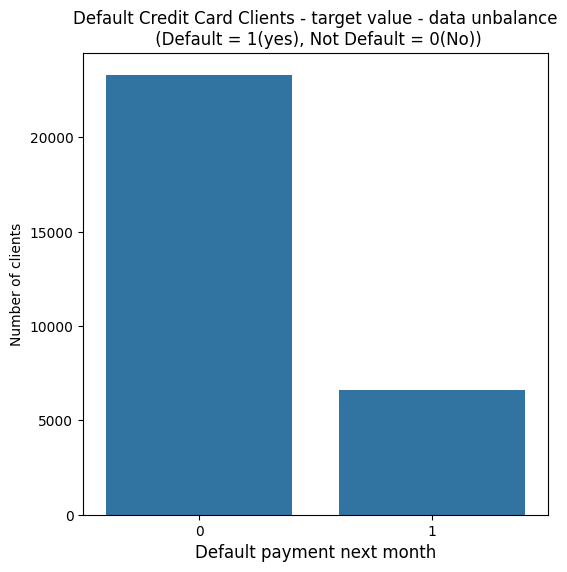

In [18]:
temp = data_df["def_pay"].value_counts()
print("Number of Non Default next month:", temp.values[0], "\nNumber of Default next month:", temp.values[1])
df = pd.DataFrame({'def_pay': temp.index,'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 1(yes), Not Default = 0(No))')
sn.set_color_codes("pastel")
sn.barplot(x = 'def_pay', y='values', data=df)
plt.xlabel('Default payment next month', fontsize=12)
plt.ylabel('Number of clients')
plt.show()

#### Amount of credit limit

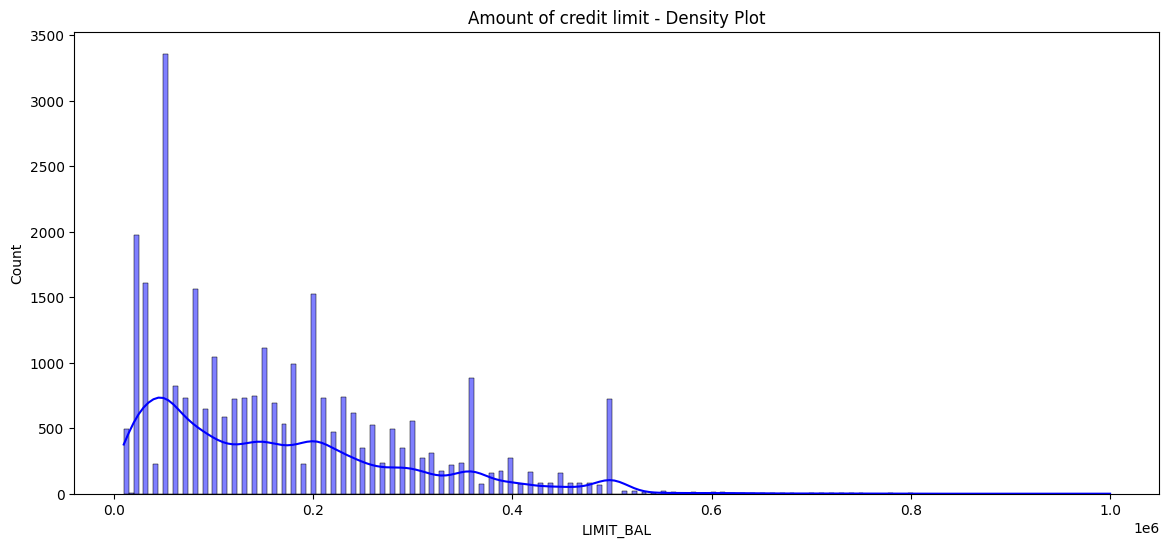

In [19]:
plt.figure(figsize = (14,6))
plt.title('Amount of credit limit - Density Plot')
sn.set_color_codes("pastel")
sn.histplot(data_df['LIMIT_BAL'],kde=True,bins=200, color="blue")
plt.show()

# By plotting the continous variables we observe that dataset consists of skewed data of limiting balance.
#We have more number of clients having limiting balance between 0 to 200000 currency.

In [20]:
data_df['LIMIT_BAL'].value_counts().shape

(81,)

In [21]:
data_df['LIMIT_BAL'].value_counts().head(5)

LIMIT_BAL
50000.0     3358
20000.0     1973
30000.0     1608
80000.0     1562
200000.0    1521
Name: count, dtype: int64

In [22]:
data_df['LIMIT_BAL'].value_counts().tail(5)

LIMIT_BAL
730000.0     2
1000000.0    1
327680.0     1
760000.0     1
690000.0     1
Name: count, dtype: int64

In [23]:
data_df['LIMIT_BAL'].max()

1000000.0

In [24]:
data_df['LIMIT_BAL'].min()

10000.0

#### Amount of credit limit grouped by default payment next month

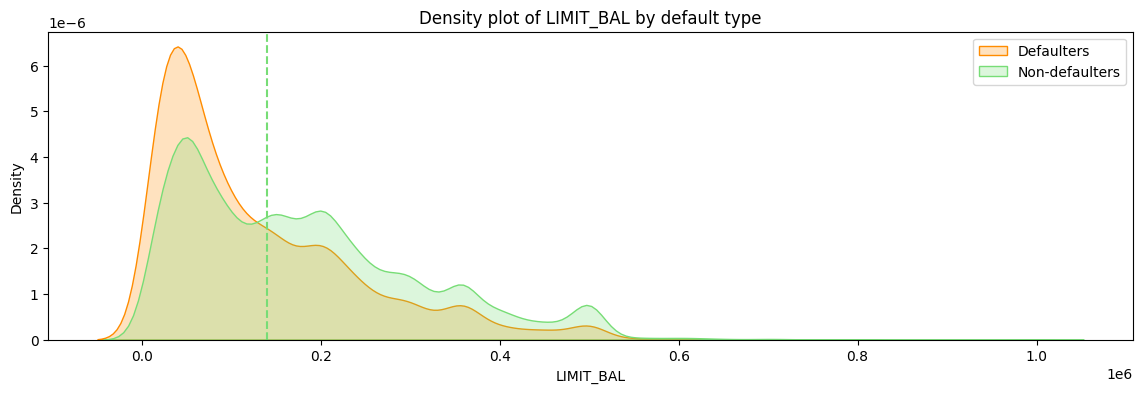

In [25]:
# Kernel density distribution
sn.set_palette(palette=['#77DD76','#FF6962'])
plt.figure(figsize = (14,4))
class_0 = data_df.loc[data_df['def_pay'] == 0]['LIMIT_BAL']
class_1 = data_df.loc[data_df['def_pay'] == 1]['LIMIT_BAL']
plt.title('Density plot of LIMIT_BAL by default type')
sn.kdeplot(class_1, fill=True, label='Defaulters', color='darkorange')
sn.kdeplot(class_0, fill=True, label='Non-defaulters')
plt.axvline(0.14*1e6, 0, ls='--')
plt.legend()

#### AGE Distribution by default type

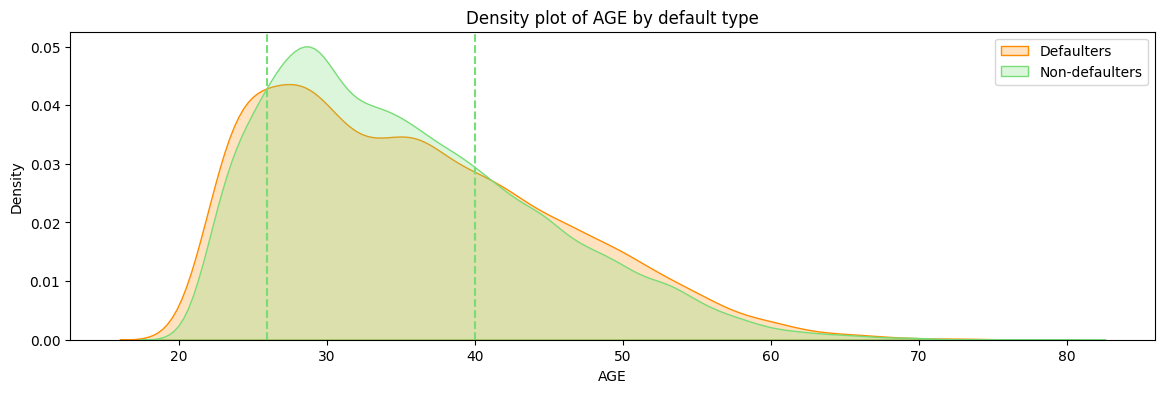

In [26]:

sn.set_palette(palette=['#77DD76','#FF6962'])
plt.figure(figsize = (14,4))
class_0 = data_df.loc[data_df['def_pay'] == 0]['AGE']
class_1 = data_df.loc[data_df['def_pay'] == 1]['AGE']
plt.title('Density plot of AGE by default type')
sn.kdeplot(class_1, fill=True, label='Defaulters', color='darkorange')
sn.kdeplot(class_0, fill=True, label='Non-defaulters')
plt.axvline(26, 0, ls='--')
plt.axvline(40, 0, ls='--')
plt.legend()


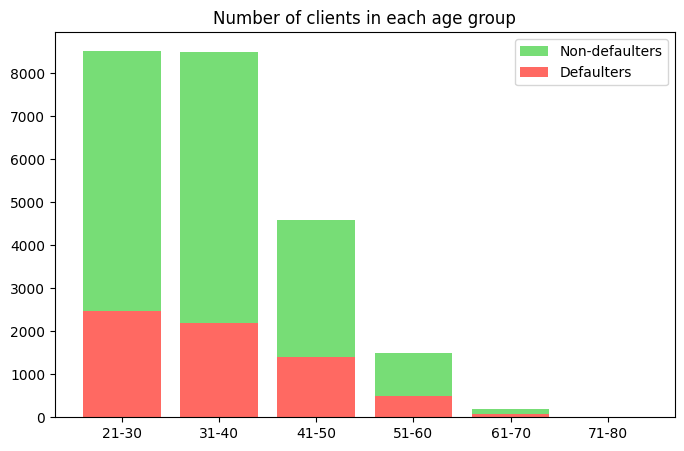

In [27]:
# Create a copy of the original dataframe
defaulters = data_df.copy()
bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
defaulters['AGE_BIN'] = pd.cut(x=defaulters.AGE, bins=bins, labels=names, right=True)

age_cnt = defaulters.AGE_BIN.value_counts()
age_0 = (defaulters.AGE_BIN[defaulters['def_pay'] == 0].value_counts())
age_1 = (defaulters.AGE_BIN[defaulters['def_pay'] == 1].value_counts())

plt.subplots(figsize=(8,5))
plt.bar(age_0.index, age_0.values, label='Non-defaulters')
plt.bar(age_1.index, age_1.values, label='Defaulters')
plt.title("Number of clients in each age group")
plt.legend()
plt.show()

#### Plotting categorical features by default type

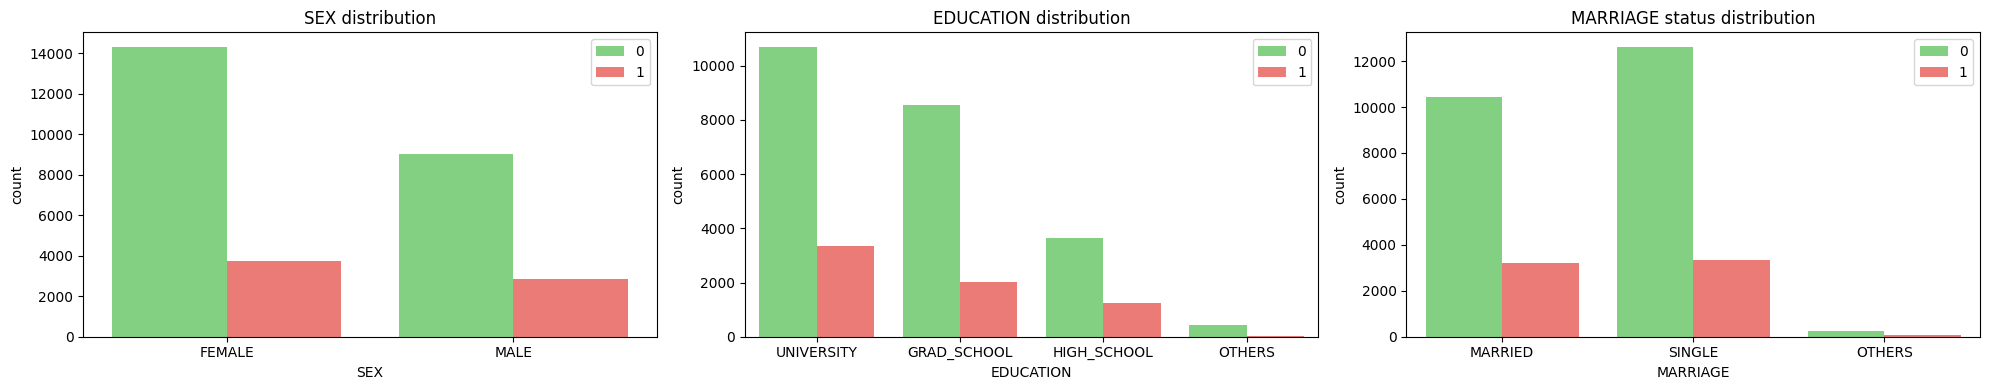

In [28]:
sn.set_palette(palette=['#77DD76','#FF6962'])
fig, axs = plt.subplots(1, 3, figsize=(20,4))

axs[0].set_title('SEX distribution')
sn.countplot(x='SEX', hue='def_pay', data=data_df, ax=axs[0])
axs[0].legend()

axs[1].set_title('EDUCATION distribution')
sn.countplot(x='EDUCATION', hue='def_pay', data=data_df, ax=axs[1])
axs[1].legend()

axs[2].set_title('MARRIAGE status distribution')
sn.countplot(x='MARRIAGE', hue='def_pay', data=data_df, ax=axs[2])
axs[2].legend()

fig.tight_layout()


##### Limit or Credit Bal by Default payment next month

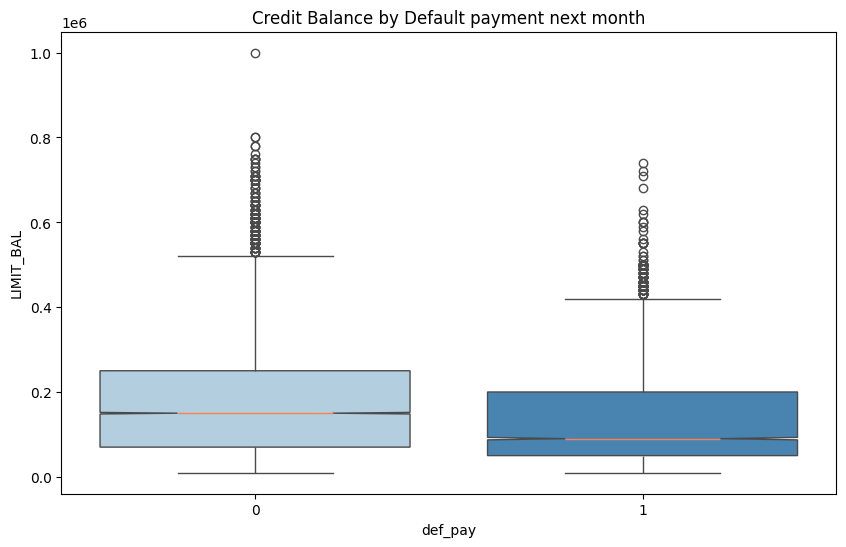

In [29]:
plt.figure(figsize = (10,6))
plt.title('Credit Balance by Default payment next month')
sn.set_color_codes("pastel")
sn.boxplot(data=data_df, x="def_pay", y="LIMIT_BAL", palette = "Blues", medianprops={"color": "coral"}, notch= True)
plt.show()

##### Sex by Default payment next month

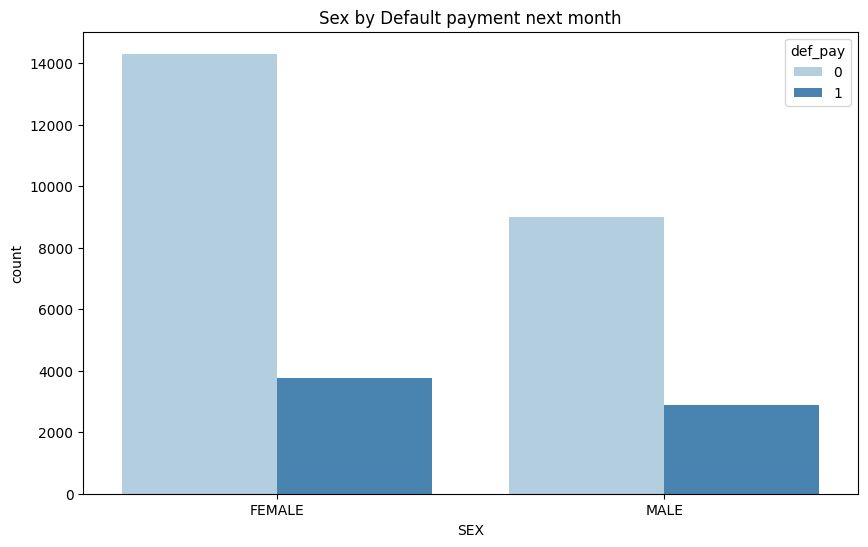

In [30]:
plt.figure(figsize = (10,6))
plt.title('Sex by Default payment next month')
sn.set_color_codes("pastel")
sn.countplot(x ='SEX', hue = "def_pay", data = data_df, palette = "Blues")
plt.show()

##### Education by Default payment next month

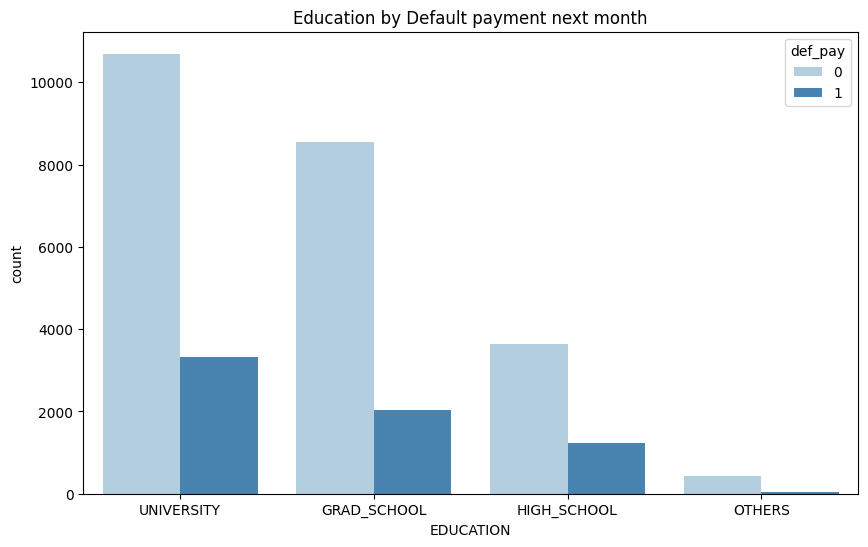

In [31]:
plt.figure(figsize = (10,6))
plt.title('Education by Default payment next month')
sn.set_color_codes("pastel")
sn.countplot(x ='EDUCATION', hue = "def_pay", data = data_df, palette = "Blues")
plt.show()

##### Marriage by Default payment next month

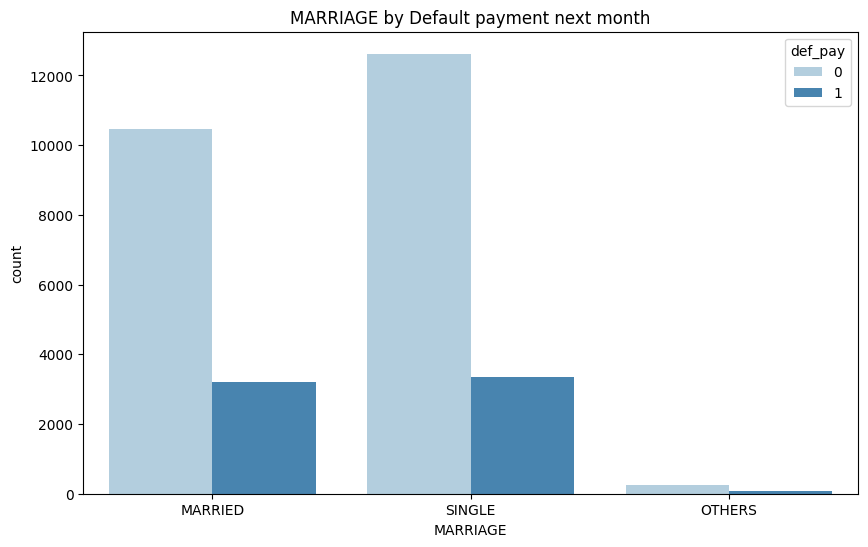

In [32]:
plt.figure(figsize = (10,6))
plt.title('MARRIAGE by Default payment next month')
sn.set_color_codes("pastel")
sn.countplot(x ='MARRIAGE', hue = "def_pay", data = data_df, palette = "Blues")
plt.show()

##### Understanding relation between Sex, Education, Age, Marriage and Credit card amount limit

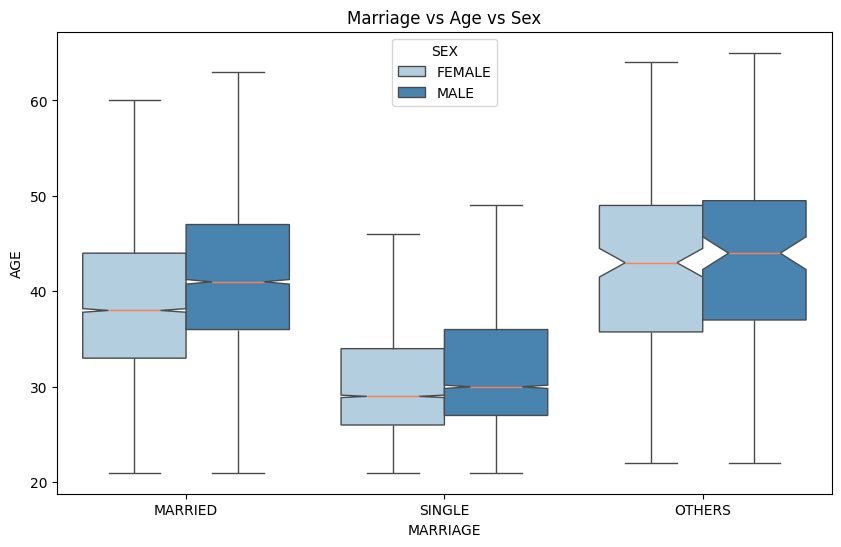

In [33]:
plt.figure(figsize = (10,6))
plt.title('Marriage vs Age vs Sex')
sn.set_color_codes("pastel")
sn.boxplot(data=data_df, x="MARRIAGE", y="AGE", hue="SEX", palette = "Blues", notch=True, showfliers=False, medianprops={"color": "coral"})
plt.show()

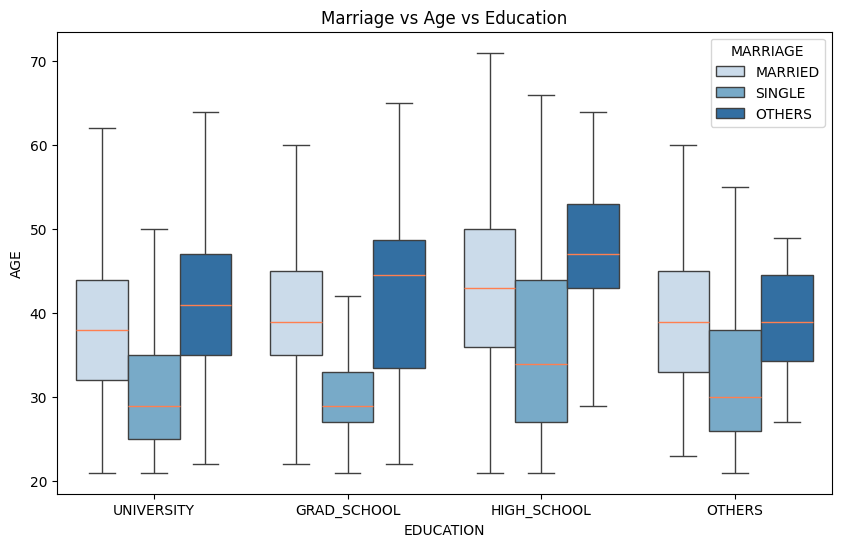

In [34]:
plt.figure(figsize = (10,6))
plt.title('Marriage vs Age vs Education')
sn.set_color_codes("pastel")
sn.boxplot(data=data_df, x="EDUCATION", y="AGE", hue="MARRIAGE", palette = "Blues", showfliers=False, medianprops={"color": "coral"})
plt.show()

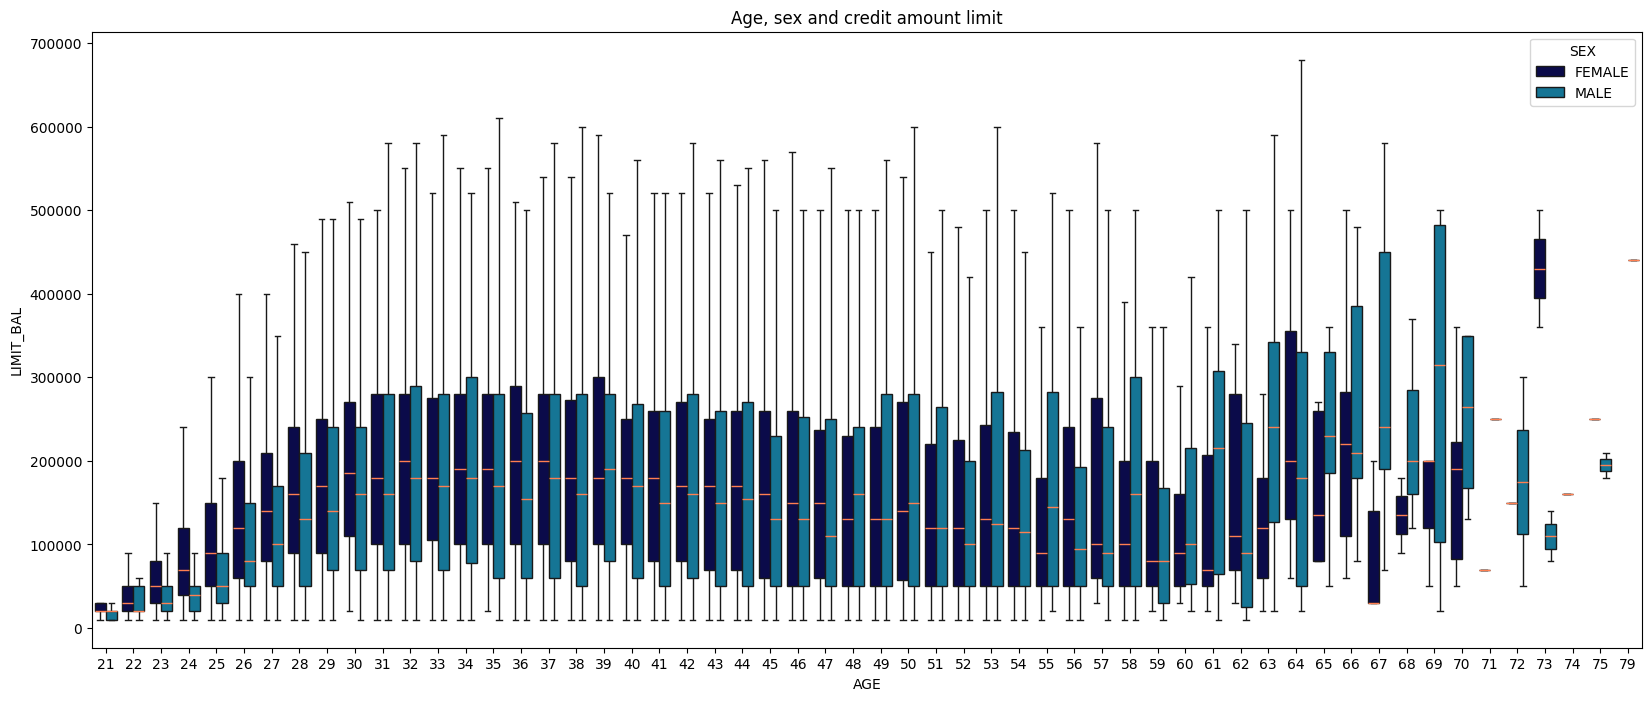

In [35]:
plt.figure(figsize = (20,8))
plt.title('Age, sex and credit amount limit')
sn.set_color_codes("pastel")
sn.boxplot(data=data_df, x="AGE", y="LIMIT_BAL", hue="SEX", palette = "ocean", showfliers=False, medianprops={"color": "coral"})
plt.show()

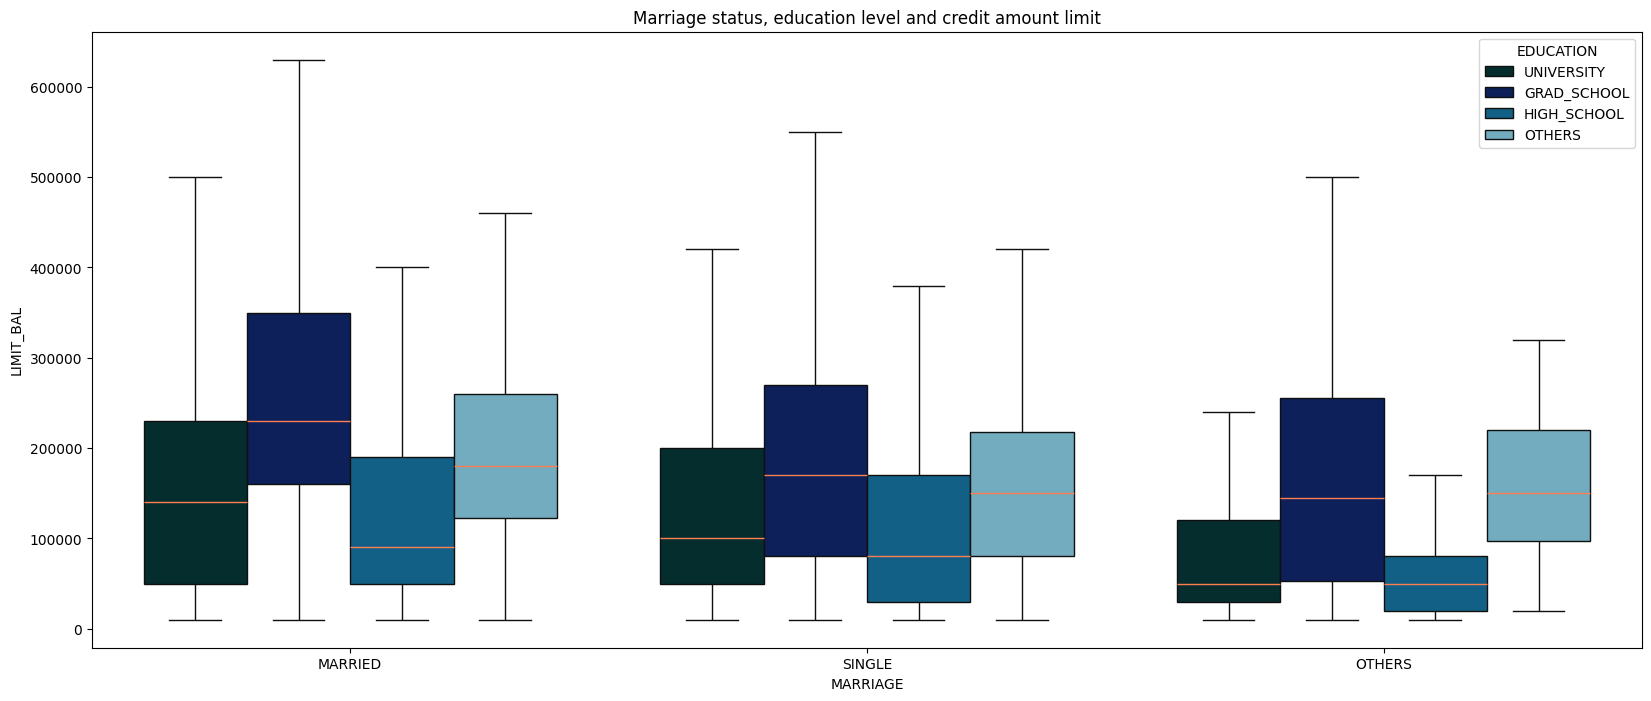

In [36]:
plt.figure(figsize = (20,8))
plt.title('Marriage status, education level and credit amount limit')
sn.set_color_codes("pastel")
sn.boxplot(data=data_df, x="MARRIAGE", y="LIMIT_BAL", hue="EDUCATION", palette = "ocean", showfliers=False, medianprops={"color": "coral"})
plt.show()

##### PAYMENT STATUS FEATURES (BY TARGET)

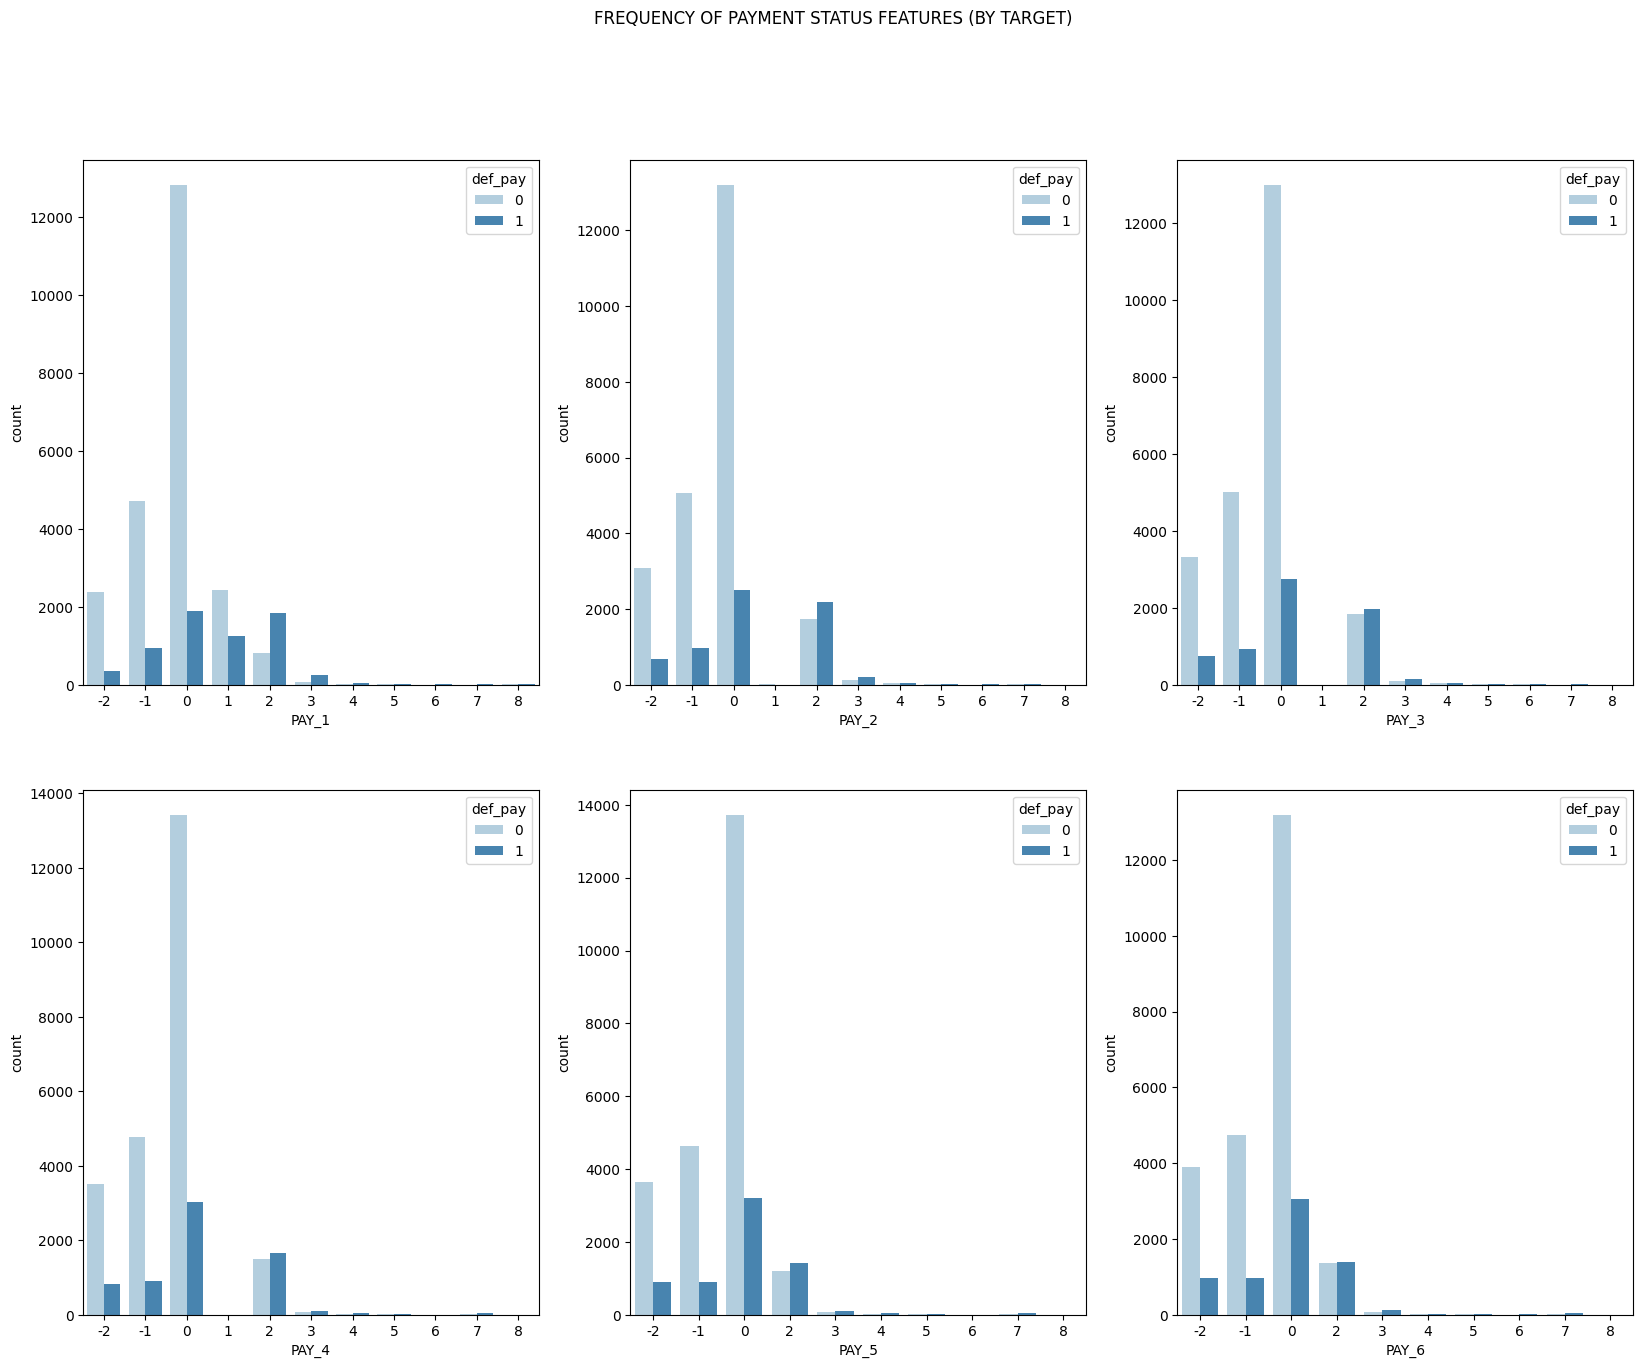

In [37]:
# Creating a new dataframe with payment status features
subset = data_df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'def_pay']]

f, axes = plt.subplots(2, 3, figsize=(20, 15), facecolor='white')
f.suptitle('FREQUENCY OF PAYMENT STATUS FEATURES (BY TARGET)')
ax1 = sn.countplot(x="PAY_1", hue="def_pay", data=subset, palette="Blues", ax=axes[0,0])
ax2 = sn.countplot(x="PAY_2", hue="def_pay", data=subset, palette="Blues",ax=axes[0,1])
ax3 = sn.countplot(x="PAY_3", hue="def_pay", data=subset, palette="Blues",ax=axes[0,2])
ax4 = sn.countplot(x="PAY_4", hue="def_pay", data=subset, palette="Blues", ax=axes[1,0])
ax5 = sn.countplot(x="PAY_5", hue="def_pay", data=subset, palette="Blues", ax=axes[1,1])
ax6 = sn.countplot(x="PAY_6", hue="def_pay", data=subset, palette="Blues", ax=axes[1,2]);



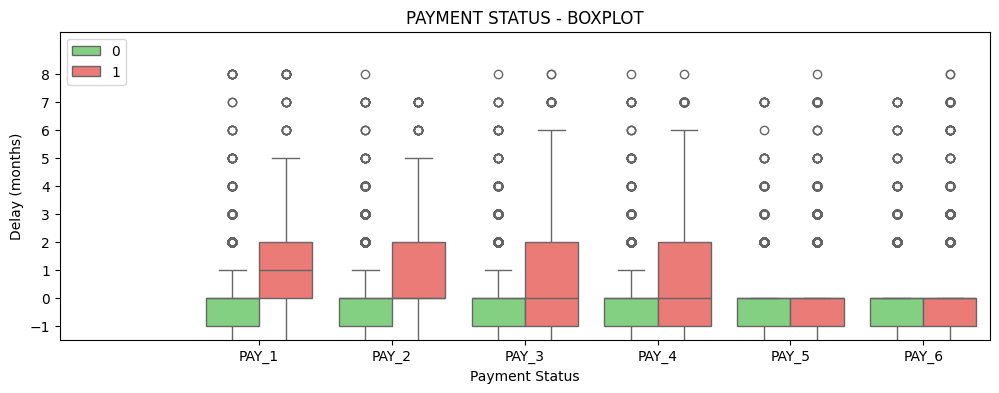

In [38]:
repayment = data_df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'def_pay']]
repayment = pd.melt(repayment, 
                    id_vars="def_pay",
                    var_name="Payment Status",
                    value_name='Delay (months)')


plt.figure(figsize=(12,4))
sn.boxplot(y="Delay (months)", x="Payment Status", hue="def_pay", data=repayment, palette=sn.color_palette(('#77DD76','#FF6962')))
plt.xlim([-1.5,5.5])
plt.ylim([-1.5,9.5])
plt.yticks(np.arange(-1,9))
plt.title('PAYMENT STATUS - BOXPLOT')
plt.legend()


The payment status feature set is shown below via boxplots. It can be seen that clients who delay payment by one month or less have fewer credit card defaults. In particular, the repayment status in September, i.e., PAY_1, holds a greater discriminatory power than the repayment status in the other months.

##### Past six months bill amount effect on the payment default next month or not:

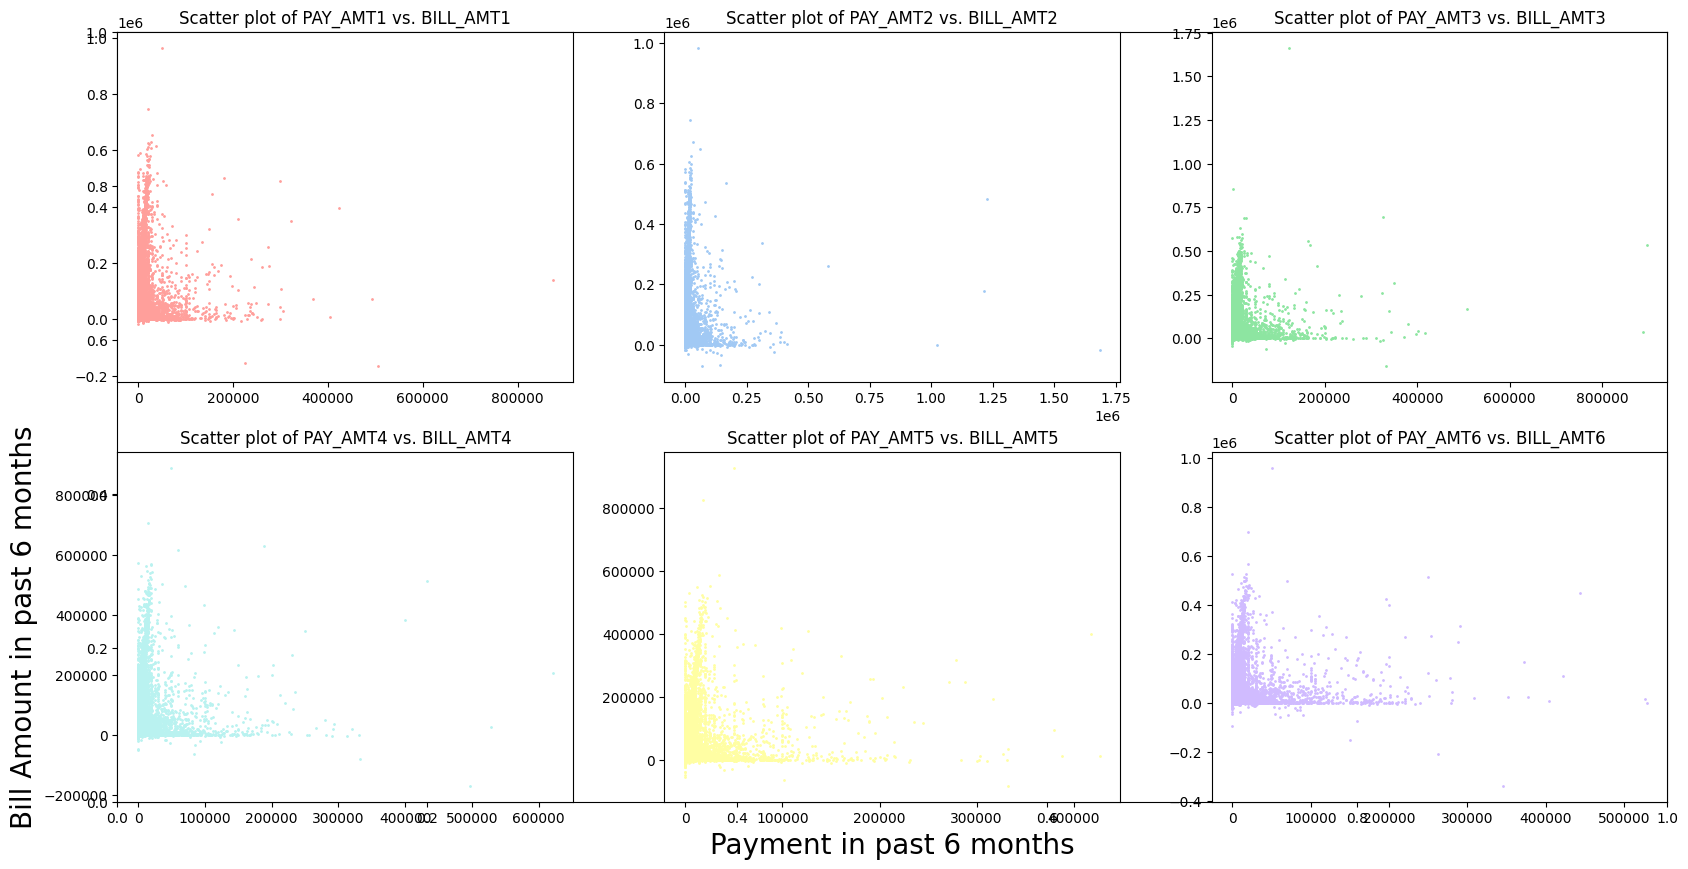

In [39]:
plt.subplots(figsize=(20, 10))

plt.subplot(231)
plt.scatter(x=data_df.PAY_AMT1, y=data_df.BILL_AMT1, c='r', s=1)
plt.title('Scatter plot of PAY_AMT1 vs. BILL_AMT1')

plt.subplot(232)
plt.scatter(x=data_df.PAY_AMT2, y=data_df.BILL_AMT2, c='b', s=1)
plt.title('Scatter plot of PAY_AMT2 vs. BILL_AMT2')

plt.subplot(233)
plt.scatter(x=data_df.PAY_AMT3, y=data_df.BILL_AMT3, c='g', s=1)
plt.title('Scatter plot of PAY_AMT3 vs. BILL_AMT3')

plt.subplot(234)
plt.scatter(x=data_df.PAY_AMT4, y=data_df.BILL_AMT4, c='c', s=1)
plt.title('Scatter plot of PAY_AMT4 vs. BILL_AMT4')
plt.ylabel("Bill Amount in past 6 months", fontsize=20)

plt.subplot(235)
plt.scatter(x=data_df.PAY_AMT5, y=data_df.BILL_AMT5, c='y', s=1)
plt.title('Scatter plot of PAY_AMT5 vs. BILL_AMT5')
plt.xlabel("Payment in past 6 months", fontsize=20)

plt.subplot(236)
plt.scatter(x=defaulters.PAY_AMT6, y=defaulters.BILL_AMT6, c='m', s=1)
plt.title('Scatter plot of PAY_AMT6 vs. BILL_AMT6')
plt.show()


Above plot indicates that there is higher proportion of clients for whom the bill amount is high but payment done against the same is very low. This we can infer since maximum number of datapoints are closely packed along the Y-axis near to 0 on X-axis

#### Correlation between variables

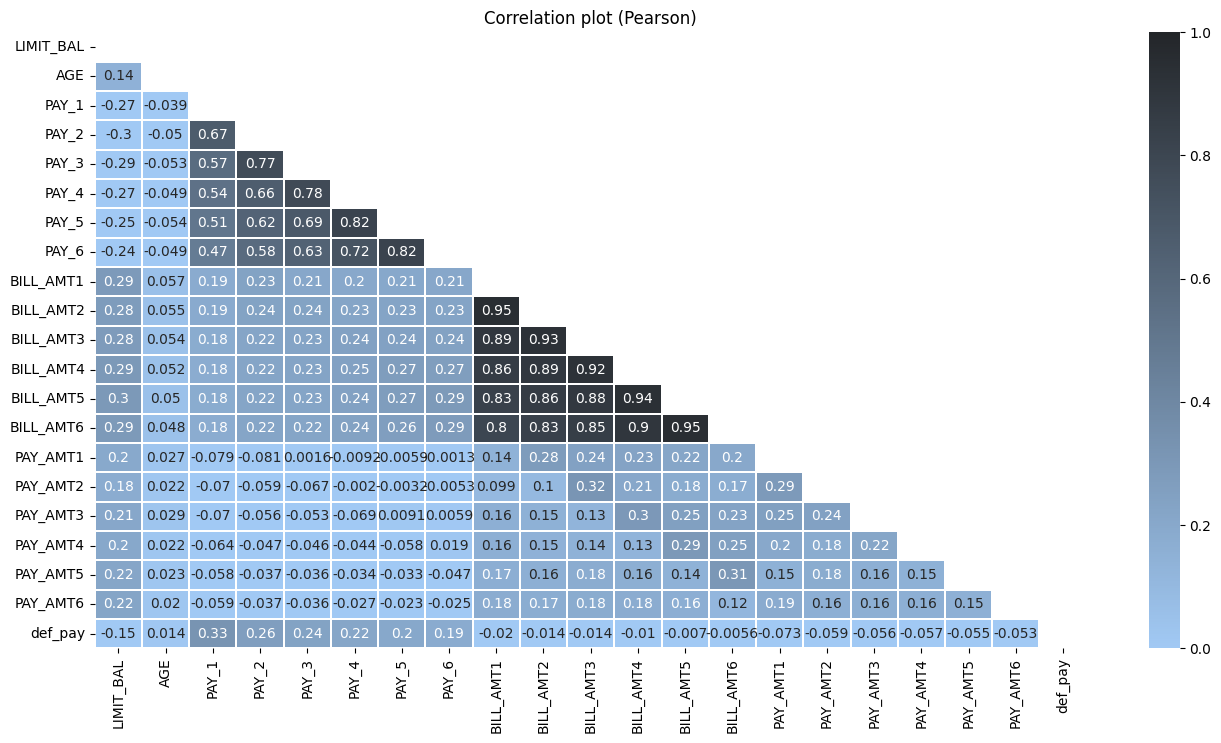

In [40]:
var = ['LIMIT_BAL','AGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6', 'def_pay']

plt.figure(figsize = (16,8))
plt.title('Correlation plot (Pearson)')
corr = data_df[var].corr()

#create a mask for the top diagonal portion
mask = np.triu(np.ones_like(corr, dtype=bool))
sn.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, mask = mask, linewidths=.1 ,vmin=0, vmax=1, cmap=sn.color_palette("dark:#a1c9f4_r", as_cmap=True), annot=True)
plt.show()

### <font color='Blue'>4. Data Preparation and trasnformation</font>

The data prepartion stage will consist of the following steps
    
    1 Missing Data Analysis & Imputation
    2 Outlier Removal
    3 Feature Encoding
    4 Train Validation Split  

#### <font color='Green'>1: Missing Data Analysis</font>

As there is no missing values, missing value analysis and imputation is not needed.

#### <font color='Green'>2: Removing Outliers</font>

Though there are outliers in some of the variables, we tend to keep those outliers as a company has customers with diverse ranges. Hence, some customer has higher credit limit and some have lower credit limits.

#### <font color='Green'>3. Encoding Categorical Features and standardizing Non-Categorical features</font>

#### <font color='Green'>Getting X_features</font>

In [41]:
X_features = ['LIMIT_BAL', 'AGE', 'SEX', 'MARRIAGE', 'EDUCATION', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4','PAY_5','PAY_6','BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
              'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

#### <font color='Green'>Identifying Categorical Variables</font>

In [42]:
categorical_features = ['EDUCATION', 'MARRIAGE', 'SEX']

#### <font color='Green'>Removing categorical variables from X_features</font>

In [43]:
X_features = ['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4','PAY_5','PAY_6','BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
              'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

#### <font color='Green'>Standardising non-categorical variables</font>

In [44]:
# Initializing the StandardScaler
X_scaler = StandardScaler()

## Standardize non-categorical variables
X = data_df[X_features]
X_scaled = X_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

In [45]:
X_scaled

LIMIT_BAL       AGE     PAY_1     PAY_2     PAY_3     PAY_4     PAY_5  \
0      -1.136673 -1.245496  1.794858  1.782567 -0.696976 -0.666976 -1.530485   
1      -0.366290 -1.028535 -0.875493  1.782567  0.138859  0.188557  0.234725   
2      -0.597405 -0.160692  0.014624  0.111651  0.138859  0.188557  0.234725   
3      -0.905558  0.164749  0.014624  0.111651  0.138859  0.188557  0.234725   
4      -0.905558  2.334356 -0.875493  0.111651 -0.696976  0.188557  0.234725   
...          ...       ...       ...       ...       ...       ...       ...   
29941   0.404092  0.381710  0.014624  0.111651  0.138859  0.188557  0.234725   
29942  -0.135176  0.815631 -0.875493 -0.723807 -0.696976 -0.666976  0.234725   
29943  -1.059635  0.164749  3.575091  2.618026  1.810529 -0.666976  0.234725   
29944  -0.674443  0.598671  0.904741 -0.723807  0.138859  0.188557  0.234725   
29945  -0.905558  1.141072  0.014624  0.111651  0.138859  0.188557  0.234725   

          PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0     -1.486530  -0.642846  -0.647624  -0.668293  -0.672738  -0.663304   
1      1.992476  -0.659553  -0.666959  -0.639572  -0.621910  -0.606511   
2      0.252973  -0.299124  -0.494222  -0.482825  -0.450116  -0.417590   
3      0.252973  -0.058209  -0.013923   0.032104  -0.232900  -0.187279   
4      0.252973  -0.579003  -0.611566  -0.161808  -0.347450  -0.348584   
...         ...        ...        ...        ...        ...        ...   
29941  0.252973   1.868431   2.016207   2.324499   0.694340  -0.149834   
29942  0.252973  -0.673111  -0.665513  -0.627755  -0.533255  -0.577991   
29943  0.252973  -0.647569  -0.644057  -0.638477  -0.348413  -0.324979   
29944 -0.616778  -0.718278   0.409369   0.421385   0.147068  -0.468433   
29945  0.252973  -0.045465  -0.004487   0.038921  -0.105193  -0.130256   

       BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0      -0.652975 -0.341929 -0.227141 -0.296731 -0.308060 -0.314198 -0.293454  
1      -0.598252 -0.341929 -0.213654 -0.239971 -0.244274 -0.314198 -0.181038  
2      -0.392047 -0.250220 -0.191971 -0.239971 -0.244274 -0.248797 -0.012415  
3      -0.157146 -0.221101 -0.169465 -0.228619 -0.237896 -0.244285 -0.237246  
4      -0.331937 -0.221101  1.333668  0.270866  0.266010 -0.269137 -0.255289  
...          ...       ...       ...       ...       ...       ...       ...  
29941  -0.384814  0.171593  0.610289 -0.012762 -0.113705  0.012805 -0.237246  
29942  -0.652975 -0.230948 -0.104113  0.213993 -0.299831 -0.314198 -0.293454  
29943  -0.328145 -0.341929 -0.257019  0.951982 -0.040160 -0.183397 -0.119210  
29944   0.168355  4.847661 -0.109187 -0.229868 -0.185209  3.149675 -0.192055  
29945  -0.396007 -0.216388 -0.178962 -0.215564 -0.244274 -0.248797 -0.237246  

[29946 rows x 20 columns]

#### <font color='Green'>Encoding Dummy Features</font>

In [46]:
categorical_feature_df = pd.get_dummies(data_df[categorical_features], drop_first=True, dtype=int)
categorical_feature_df

EDUCATION_HIGH_SCHOOL  EDUCATION_OTHERS  EDUCATION_UNIVERSITY  \
0                          0                 0                     1   
1                          0                 0                     1   
2                          0                 0                     1   
3                          0                 0                     1   
4                          0                 0                     1   
...                      ...               ...                   ...   
29941                      1                 0                     0   
29942                      1                 0                     0   
29943                      0                 0                     1   
29944                      1                 0                     0   
29945                      0                 0                     1   

       MARRIAGE_OTHERS  MARRIAGE_SINGLE  SEX_MALE  
0                    0                0         0  
1                    0                1         0  
2                    0                1         0  
3                    0                0         0  
4                    0                0         1  
...                ...              ...       ...  
29941                0                0         1  
29942                0                1         1  
29943                0                1         1  
29944                0                0         1  
29945                0                0         1  

[29946 rows x 6 columns]

#### <font color='Green'>Adding categorical variables back</font>

In [47]:
encoded_data_df = pd.concat([X_scaled, categorical_feature_df], axis=1)
encoded_data_df_NN = pd.concat([X, categorical_feature_df], axis=1)
#encoded_data_df.drop('def_pay', axis=1, inplace=True)

In [48]:
encoded_data_df

LIMIT_BAL       AGE     PAY_1     PAY_2     PAY_3     PAY_4     PAY_5  \
0      -1.136673 -1.245496  1.794858  1.782567 -0.696976 -0.666976 -1.530485   
1      -0.366290 -1.028535 -0.875493  1.782567  0.138859  0.188557  0.234725   
2      -0.597405 -0.160692  0.014624  0.111651  0.138859  0.188557  0.234725   
3      -0.905558  0.164749  0.014624  0.111651  0.138859  0.188557  0.234725   
4      -0.905558  2.334356 -0.875493  0.111651 -0.696976  0.188557  0.234725   
...          ...       ...       ...       ...       ...       ...       ...   
29941   0.404092  0.381710  0.014624  0.111651  0.138859  0.188557  0.234725   
29942  -0.135176  0.815631 -0.875493 -0.723807 -0.696976 -0.666976  0.234725   
29943  -1.059635  0.164749  3.575091  2.618026  1.810529 -0.666976  0.234725   
29944  -0.674443  0.598671  0.904741 -0.723807  0.138859  0.188557  0.234725   
29945  -0.905558  1.141072  0.014624  0.111651  0.138859  0.188557  0.234725   

          PAY_6  BILL_AMT1  BILL_AMT2  ...  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
0     -1.486530  -0.642846  -0.647624  ... -0.296731 -0.308060 -0.314198   
1      1.992476  -0.659553  -0.666959  ... -0.239971 -0.244274 -0.314198   
2      0.252973  -0.299124  -0.494222  ... -0.239971 -0.244274 -0.248797   
3      0.252973  -0.058209  -0.013923  ... -0.228619 -0.237896 -0.244285   
4      0.252973  -0.579003  -0.611566  ...  0.270866  0.266010 -0.269137   
...         ...        ...        ...  ...       ...       ...       ...   
29941  0.252973   1.868431   2.016207  ... -0.012762 -0.113705  0.012805   
29942  0.252973  -0.673111  -0.665513  ...  0.213993 -0.299831 -0.314198   
29943  0.252973  -0.647569  -0.644057  ...  0.951982 -0.040160 -0.183397   
29944 -0.616778  -0.718278   0.409369  ... -0.229868 -0.185209  3.149675   
29945  0.252973  -0.045465  -0.004487  ... -0.215564 -0.244274 -0.248797   

       PAY_AMT6  EDUCATION_HIGH_SCHOOL  EDUCATION_OTHERS  \
0     -0.293454                      0                 0   
1     -0.181038                      0                 0   
2     -0.012415                      0                 0   
3     -0.237246                      0                 0   
4     -0.255289                      0                 0   
...         ...                    ...               ...   
29941 -0.237246                      1                 0   
29942 -0.293454                      1                 0   
29943 -0.119210                      0                 0   
29944 -0.192055                      1                 0   
29945 -0.237246                      0                 0   

       EDUCATION_UNIVERSITY  MARRIAGE_OTHERS  MARRIAGE_SINGLE  SEX_MALE  
0                         1                0                0         0  
1                         1                0                1         0  
2                         1                0                1         0  
3                         1                0                0         0  
4                         1                0                0         1  
...                     ...              ...              ...       ...  
29941                     0                0                0         1  
29942                     0                0                1         1  
29943                     1                0                1         1  
29944                     0                0                0         1  
29945                     1                0                0         1  

[29946 rows x 26 columns]

In [49]:
encoded_data_df_NN

LIMIT_BAL  AGE  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  \
0        20000.0   24      2      2     -1     -1     -2     -2     3913.0   
1       120000.0   26     -1      2      0      0      0      2     2682.0   
2        90000.0   34      0      0      0      0      0      0    29239.0   
3        50000.0   37      0      0      0      0      0      0    46990.0   
4        50000.0   57     -1      0     -1      0      0      0     8617.0   
...          ...  ...    ...    ...    ...    ...    ...    ...        ...   
29941   220000.0   39      0      0      0      0      0      0   188948.0   
29942   150000.0   43     -1     -1     -1     -1      0      0     1683.0   
29943    30000.0   37      4      3      2     -1      0      0     3565.0   
29944    80000.0   41      1     -1      0      0      0     -1    -1645.0   
29945    50000.0   46      0      0      0      0      0      0    47929.0   

       BILL_AMT2  ...  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0         3102.0  ...       0.0       0.0       0.0       0.0   
1         1725.0  ...    1000.0    1000.0       0.0    2000.0   
2        14027.0  ...    1000.0    1000.0    1000.0    5000.0   
3        48233.0  ...    1200.0    1100.0    1069.0    1000.0   
4         5670.0  ...   10000.0    9000.0     689.0     679.0   
...          ...  ...       ...       ...       ...       ...   
29941   192815.0  ...    5003.0    3047.0    5000.0    1000.0   
29942     1828.0  ...    8998.0     129.0       0.0       0.0   
29943     3356.0  ...   22000.0    4200.0    2000.0    3100.0   
29944    78379.0  ...    1178.0    1926.0   52964.0    1804.0   
29945    48905.0  ...    1430.0    1000.0    1000.0    1000.0   

       EDUCATION_HIGH_SCHOOL  EDUCATION_OTHERS  EDUCATION_UNIVERSITY  \
0                          0                 0                     1   
1                          0                 0                     1   
2                          0                 0                     1   
3                          0                 0                     1   
4                          0                 0                     1   
...                      ...               ...                   ...   
29941                      1                 0                     0   
29942                      1                 0                     0   
29943                      0                 0                     1   
29944                      1                 0                     0   
29945                      0                 0                     1   

       MARRIAGE_OTHERS  MARRIAGE_SINGLE  SEX_MALE  
0                    0                0         0  
1                    0                1         0  
2                    0                1         0  
3                    0                0         0  
4                    0                0         1  
...                ...              ...       ...  
29941                0                0         1  
29942                0                1         1  
29943                0                1         1  
29944                0                0         1  
29945                0                0         1  

[29946 rows x 26 columns]

In [50]:
X_features = list(encoded_data_df.columns)


In [51]:
X_features

['LIMIT_BAL',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'EDUCATION_HIGH_SCHOOL',
 'EDUCATION_OTHERS',
 'EDUCATION_UNIVERSITY',
 'MARRIAGE_OTHERS',
 'MARRIAGE_SINGLE',
 'SEX_MALE']

#### Checking some encoded features

In [52]:
encoded_data_df[['EDUCATION_HIGH_SCHOOL','EDUCATION_UNIVERSITY','EDUCATION_OTHERS']].head(5)

EDUCATION_HIGH_SCHOOL  EDUCATION_UNIVERSITY  EDUCATION_OTHERS
0                      0                     1                 0
1                      0                     1                 0
2                      0                     1                 0
3                      0                     1                 0
4                      0                     1                 0

In [53]:
encoded_data_df_NN[['EDUCATION_HIGH_SCHOOL','EDUCATION_UNIVERSITY','EDUCATION_OTHERS']].head(5)

EDUCATION_HIGH_SCHOOL  EDUCATION_UNIVERSITY  EDUCATION_OTHERS
0                      0                     1                 0
1                      0                     1                 0
2                      0                     1                 0
3                      0                     1                 0
4                      0                     1                 0

In [54]:
encoded_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29946 entries, 0 to 29945
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LIMIT_BAL              29946 non-null  float64
 1   AGE                    29946 non-null  float64
 2   PAY_1                  29946 non-null  float64
 3   PAY_2                  29946 non-null  float64
 4   PAY_3                  29946 non-null  float64
 5   PAY_4                  29946 non-null  float64
 6   PAY_5                  29946 non-null  float64
 7   PAY_6                  29946 non-null  float64
 8   BILL_AMT1              29946 non-null  float64
 9   BILL_AMT2              29946 non-null  float64
 10  BILL_AMT3              29946 non-null  float64
 11  BILL_AMT4              29946 non-null  float64
 12  BILL_AMT5              29946 non-null  float64
 13  BILL_AMT6              29946 non-null  float64
 14  PAY_AMT1               29946 non-null  float64
 15  PA

In [55]:
encoded_data_df_NN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29946 entries, 0 to 29945
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LIMIT_BAL              29946 non-null  float64
 1   AGE                    29946 non-null  int64  
 2   PAY_1                  29946 non-null  int64  
 3   PAY_2                  29946 non-null  int64  
 4   PAY_3                  29946 non-null  int64  
 5   PAY_4                  29946 non-null  int64  
 6   PAY_5                  29946 non-null  int64  
 7   PAY_6                  29946 non-null  int64  
 8   BILL_AMT1              29946 non-null  float64
 9   BILL_AMT2              29946 non-null  float64
 10  BILL_AMT3              29946 non-null  float64
 11  BILL_AMT4              29946 non-null  float64
 12  BILL_AMT5              29946 non-null  float64
 13  BILL_AMT6              29946 non-null  float64
 14  PAY_AMT1               29946 non-null  float64
 15  PA

### <font color='Blue'>Function for ROC Curve</font>

In [56]:
def draw_roc( actual, probs ):
    fpr, \
    tpr, \
    thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds

### <font color='Blue'>Model Building</font>

## <font color='Blue'>Classification through DNN</font>

In [57]:
Y = data_df['def_pay']
X = encoded_data_df_NN

### <font color='Blue'>1.4 Splitting into Train and Validation Sets </font>

In [58]:
train_data, test_data, train_targets, test_targets = train_test_split( X , Y, train_size = 0.7, random_state = 42 )

### <font color='Blue'>1.5 Converting Data Frame into Array </font>

#### <font color='Blue'>1.5.1 Converting Train and Test Targets into Array </font>

In [59]:
train_targets = train_targets.to_numpy()
test_targets = test_targets.to_numpy()

In [60]:
train_targets

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [61]:
test_targets

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

#### <font color='Blue'>1.5.2 Converting Train and Test Data into Array </font>

In [62]:
train_data = train_data.to_numpy()
test_data = test_data.to_numpy()

In [63]:
train_data.shape

(20962, 26)

In [64]:
test_data.shape

(8984, 26)

### <font color='Blue'>1.6 Data Normalization </font>

In [65]:
mean = train_data.mean(axis=0)
std  = train_data.std(axis=0)

train_data = train_data - mean
train_data = train_data/std

test_data = test_data - mean
test_data = test_data/std

In [66]:
train_data[0]

array([ 2.56989732,  0.05002176,  0.00906407,  0.1079717 ,  0.13850964,
        0.18702443,  0.23250956,  0.25118195,  3.29837412,  3.4165432 ,
        3.55211888,  3.80528527,  3.84751796,  3.81425994,  0.90546583,
        0.6861962 ,  0.86240229,  0.35952017,  0.65166058,  0.28683876,
       -0.44092625, -0.12371592, -0.94060245, -0.10369517, -1.06009883,
        1.23488208])

In [67]:
test_data[0]

array([-0.13123685,  0.5902361 ,  0.00906407,  0.1079717 ,  0.13850964,
        0.18702443,  0.23250956, -1.48940515, -0.41290945, -0.39347744,
       -0.37702883, -0.33773316, -0.66526366, -0.65322433, -0.25800672,
       -0.20860636, -0.2434231 , -0.32277688, -0.30590399, -0.30096958,
        2.26795299, -0.12371592, -0.94060245, -0.10369517, -1.06009883,
       -0.80979392])

### <font color='Blue'>1.7 Building (Defining our Network) </font>

In [68]:
from keras import models
from keras import layers

In [69]:
from keras import backend as K
K.clear_session()

model = models.Sequential()
model.add(layers.Dense(16, activation='relu',
                           input_shape=(train_data.shape[1],)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### <font color='Blue'>1.8 Fitting our Model </font>

In [70]:
hist = model.fit(train_data, train_targets,
                             epochs=25,
                             batch_size=32,verbose=2,
                             validation_data=(test_data, test_targets))

Epoch 1/25
656/656 - 3s - loss: 0.5059 - accuracy: 0.7856 - val_loss: 0.4771 - val_accuracy: 0.8138 - 3s/epoch - 4ms/step
Epoch 2/25
656/656 - 2s - loss: 0.4553 - accuracy: 0.8157 - val_loss: 0.4621 - val_accuracy: 0.8168 - 2s/epoch - 3ms/step
Epoch 3/25
656/656 - 2s - loss: 0.4466 - accuracy: 0.8183 - val_loss: 0.4580 - val_accuracy: 0.8181 - 2s/epoch - 3ms/step
Epoch 4/25
656/656 - 2s - loss: 0.4421 - accuracy: 0.8191 - val_loss: 0.4546 - val_accuracy: 0.8196 - 2s/epoch - 3ms/step
Epoch 5/25
656/656 - 2s - loss: 0.4400 - accuracy: 0.8190 - val_loss: 0.4526 - val_accuracy: 0.8199 - 2s/epoch - 3ms/step
Epoch 6/25
656/656 - 2s - loss: 0.4383 - accuracy: 0.8190 - val_loss: 0.4503 - val_accuracy: 0.8208 - 2s/epoch - 3ms/step
Epoch 7/25
656/656 - 2s - loss: 0.4373 - accuracy: 0.8199 - val_loss: 0.4533 - val_accuracy: 0.8189 - 2s/epoch - 3ms/step
Epoch 8/25
656/656 - 2s - loss: 0.4360 - accuracy: 0.8199 - val_loss: 0.4515 - val_accuracy: 0.8209 - 2s/epoch - 3ms/step
Epoch 9/25
656/656 - 2s 

In [71]:
history_dict = hist.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### <font color='Blue'>1.9 Comparison of Accuracy in Training and Test Data Set </font>

In [72]:
epochs = range(1, 26)
tra_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

tra_loss = hist.history['loss']
val_loss = hist.history['val_loss']

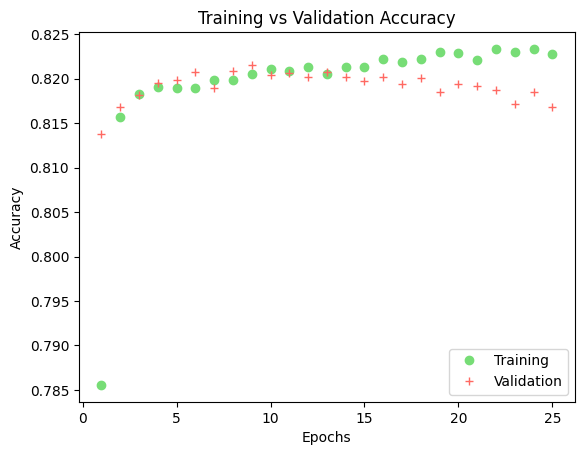

In [73]:
plt.plot(epochs, tra_acc, 'o', label='Training')
plt.plot(epochs, val_acc, '+', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

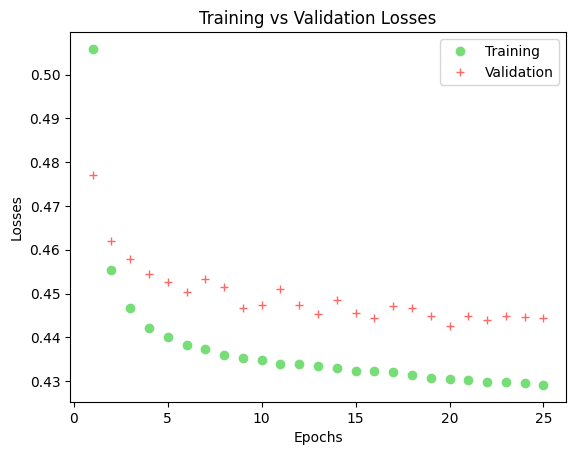

In [74]:
plt.plot(epochs, tra_loss, 'o', label='Training')
plt.plot(epochs, val_loss, '+', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.title('Training vs Validation Losses')
plt.legend()
plt.show()

### <font color='Blue'>1.10 Extracting Predicted Probabilities </font>

In [75]:
pred_probs=model.predict(test_data)
predicted_prob=pd.DataFrame(pred_probs)

281/281 [==============================] - 1s 1ms/step


In [76]:
y_pred_df = pd.DataFrame( { "actual": test_targets, "predicted_prob":predicted_prob[0]
                          } )
y_pred_df

actual  predicted_prob
0          0        0.143570
1          0        0.155361
2          0        0.072449
3          1        0.162883
4          0        0.136842
...      ...             ...
8979       1        0.122921
8980       0        0.127677
8981       1        0.894795
8982       0        0.200154
8983       0        0.111071

[8984 rows x 2 columns]

### <font color='Blue'>1.11 Classifier Performance </font>

<b> RoC Curve </b>

RoC Curve can be used to understand the overall performance of the classifier and used for model selection. <br>
RoC Curve is a plot between False positive rate [FP / (TN + FP)] and True positive rate [TP / (TP+FN)] <br>

Higher the AUC, better the model <br>
AUC < 0.5 model is inferior to a case of having no model <br>
AUC > 0.7 model is useful

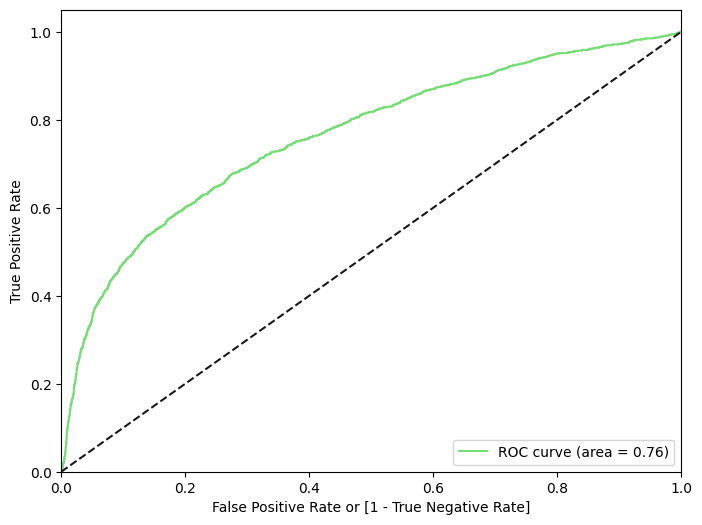

auc_score: 0.76


In [77]:
fpr, tpr, thresholds = draw_roc( y_pred_df.actual, y_pred_df.predicted_prob)

auc_score = metrics.roc_auc_score( y_pred_df.actual, y_pred_df.predicted_prob )
print("auc_score:", round( float( auc_score ), 2 ))

### <font color='Blue'>1.12 Choosing a threshold </font>

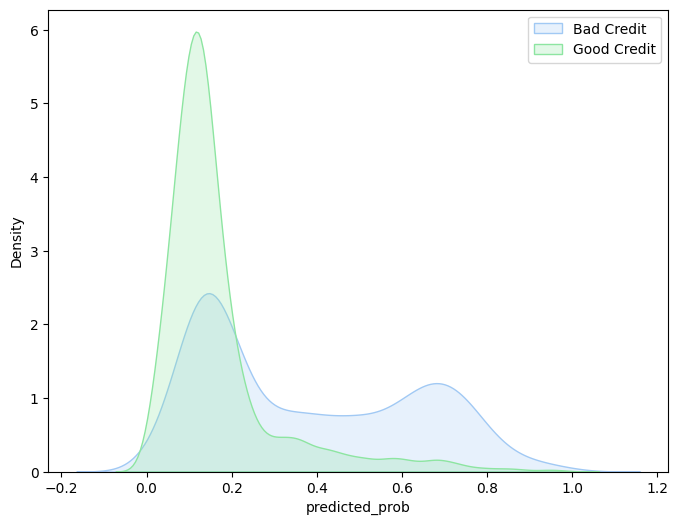

In [78]:
plt.figure( figsize = (8,6) )
sn.kdeplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], color = 'b', shade=True,label = 'Bad Credit' )
sn.kdeplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], color = 'g', shade=True,label = 'Good Credit' )
plt.legend()
plt.show()

### <font color='Blue'>1.13 Performance Measures from Confusion Matrix </font>

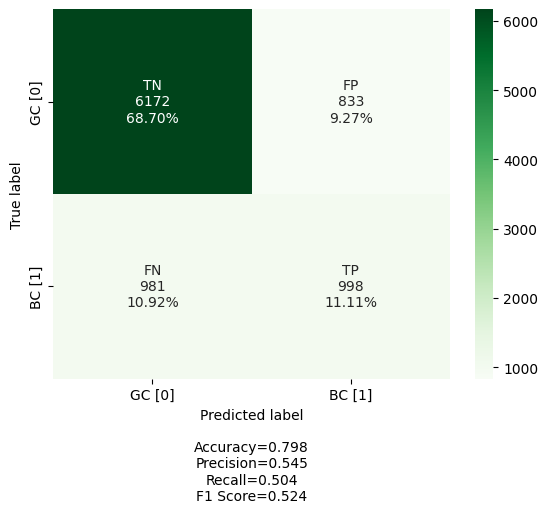

In [79]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.3 else 0)
from confusion_matrix import make_confusion_matrix
cf_matrix = metrics.confusion_matrix(y_pred_df.actual, y_pred_df.predicted)
labels = ["TN","FP","FN","TP"]
categories = ["GC [0]","BC [1]"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Greens")

In [80]:
print( metrics.classification_report( y_pred_df.actual, y_pred_df.predicted ) )

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      7005
           1       0.55      0.50      0.52      1979

    accuracy                           0.80      8984
   macro avg       0.70      0.69      0.70      8984
weighted avg       0.79      0.80      0.80      8984



## <font color='Green'>Hyperparameter Tuning Methods</font>


<b>Standardising Data </b>

In [81]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
X

array([[0.01010101, 0.05172414, 0.4       , ..., 0.        , 0.        ,
        0.        ],
       [0.11111111, 0.0862069 , 0.1       , ..., 0.        , 1.        ,
        0.        ],
       [0.08080808, 0.22413793, 0.2       , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.02020202, 0.27586207, 0.6       , ..., 0.        , 1.        ,
        1.        ],
       [0.07070707, 0.34482759, 0.3       , ..., 0.        , 0.        ,
        1.        ],
       [0.04040404, 0.43103448, 0.2       , ..., 0.        , 0.        ,
        1.        ]])

<b>Dividing Data into Train and Validation</b>

In [82]:
X_train, X_test, y_train, y_test = train_test_split( X , Y, train_size = 0.7, random_state = 10 )

In [83]:
np.shape(X_train)

(20962, 26)

In [84]:
np.shape(X_test)

(8984, 26)

In [85]:
np.shape(y_train)

(20962,)

In [86]:
np.shape(y_test)

(8984,)

### <font color='Blue'>1.2 Hyperparameter Tuning - Grid Search</font>

#### <font color='Green'>STEP 1.2.1: Defining the Architecture</font>

In [87]:
from tensorflow.keras import backend as K
K.clear_session()

In [88]:
def create_model(unit):
    model = Sequential()
    model.add(Dense(unit, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

#### <font color='Green'>STEP 1.2.2: Defining the Model</font>

In [89]:
model = KerasClassifier(build_fn=create_model, verbose=1)

#### <font color='Green'>STEP 1.2.3: Defining Hyperparameters</font>

In [90]:
params={'batch_size':[16, 32], 
        'epochs':[15, 30],
        'unit':[8, 16]
       }

#### <font color='Green'>STEP 1.2.4: Executing Grid Search</font>

In [91]:
early_stopping = EarlyStopping(monitor='loss', patience=5)

In [92]:
grid_model = GridSearchCV(estimator=model, param_grid=params, n_jobs=-1, cv=4)

In [93]:
grid_result = grid_model.fit(X_train, y_train,callbacks=[early_stopping],validation_split=0.2)

Epoch 1/30
1049/1049 [==============================] - 3s 3ms/step - loss: 0.5120 - accuracy: 0.7804 - val_loss: 0.4954 - val_accuracy: 0.7751
Epoch 2/30
1049/1049 [==============================] - 2s 2ms/step - loss: 0.4650 - accuracy: 0.8033 - val_loss: 0.4873 - val_accuracy: 0.7875
Epoch 3/30
1049/1049 [==============================] - 3s 2ms/step - loss: 0.4565 - accuracy: 0.8079 - val_loss: 0.4795 - val_accuracy: 0.7994
Epoch 4/30
1049/1049 [==============================] - 3s 2ms/step - loss: 0.4507 - accuracy: 0.8102 - val_loss: 0.4776 - val_accuracy: 0.7985
Epoch 5/30
1049/1049 [==============================] - 3s 2ms/step - loss: 0.4469 - accuracy: 0.8134 - val_loss: 0.4749 - val_accuracy: 0.7999
Epoch 6/30
1049/1049 [==============================] - 2s 2ms/step - loss: 0.4449 - accuracy: 0.8145 - val_loss: 0.4728 - val_accuracy: 0.8018
Epoch 7/30
1049/1049 [==============================] - 3s 2ms/step - loss: 0.4431 - accuracy: 0.8153 - val_loss: 0.4765 - val_accuracy:

In [98]:
results_df = pd.DataFrame(grid_result.cv_results_)
results_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      28.428459      0.483902         0.724486        0.057117   
1      31.242460      0.777186         0.647404        0.015593   
2      59.974656      0.777515         0.763030        0.079124   
3      69.662173      7.994029         0.732455        0.032685   
4      15.971912      0.114129         0.412853        0.027387   

  param_batch_size param_epochs param_unit  \
0               16           15          8   
1               16           15         16   
2               16           30          8   
3               16           30         16   
4               32           15          8   

                                         params  split0_test_score  \
0   {'batch_size': 16, 'epochs': 15, 'unit': 8}           0.801374   
1  {'batch_size': 16, 'epochs': 15, 'unit': 16}           0.810914   
2   {'batch_size': 16, 'epochs': 30, 'unit': 8}           0.802709   
3  {'batch_size': 16, 'epochs': 30, 'unit': 16}           0.807289   
4   {'batch_size': 32, 'epochs': 15, 'unit': 8}           0.802519   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0           0.809769           0.828817           0.809160         0.812280   
1           0.811868           0.831870           0.811260         0.816478   
2           0.815112           0.835305           0.812405         0.816383   
3           0.815493           0.837977           0.810305         0.817766   
4           0.806144           0.831107           0.808969         0.812185   

   std_test_score  rank_test_score  
0        0.010105                7  
1        0.008893                2  
2        0.011858                3  
3        0.012032                1  
4        0.011161                8

#### <font color='Green'>STEP 1.2.5: Obtaining Best Parameters</font>

In [99]:
grid_result.best_score_

0.8177661001682281

In [100]:
grid_result.best_params_

{'batch_size': 16, 'epochs': 30, 'unit': 16}

#### <font color='Green'>STEP 1.2.6: Print Results</font>

In [101]:
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, params in zip(means, params):
    print("Score: %f Hyperparameters: %r " % (mean, params))

Score: 0.812280 Hyperparameters: {'batch_size': 16, 'epochs': 15, 'unit': 8} 
Score: 0.816478 Hyperparameters: {'batch_size': 16, 'epochs': 15, 'unit': 16} 
Score: 0.816383 Hyperparameters: {'batch_size': 16, 'epochs': 30, 'unit': 8} 
Score: 0.817766 Hyperparameters: {'batch_size': 16, 'epochs': 30, 'unit': 16} 
Score: 0.812185 Hyperparameters: {'batch_size': 32, 'epochs': 15, 'unit': 8} 
Score: 0.813520 Hyperparameters: {'batch_size': 32, 'epochs': 15, 'unit': 16} 
Score: 0.813950 Hyperparameters: {'batch_size': 32, 'epochs': 30, 'unit': 8} 
Score: 0.815476 Hyperparameters: {'batch_size': 32, 'epochs': 30, 'unit': 16} 


### <font color='Blue'>1.3 Model Building with Identified Hyperparameters</font>

In [102]:
K.clear_session()

model = Sequential()
model.add(Dense(16, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/30
525/525 [==============================] - 2s 2ms/step - loss: 0.5314 - accuracy: 0.7813 - val_loss: 0.5116 - val_accuracy: 0.7648
Epoch 2/30
525/525 [==============================] - 1s 2ms/step - loss: 0.4752 - accuracy: 0.7963 - val_loss: 0.4922 - val_accuracy: 0.7870
Epoch 3/30
525/525 [==============================] - 1s 2ms/step - loss: 0.4647 - accuracy: 0.8046 - val_loss: 0.4876 - val_accuracy: 0.7880
Epoch 4/30
525/525 [==============================] - 1s 1ms/step - loss: 0.4588 - accuracy: 0.8079 - val_loss: 0.4848 - val_accuracy: 0.7877
Epoch 5/30
525/525 [==============================] - 1s 2ms/step - loss: 0.4538 - accuracy: 0.8096 - val_loss: 0.4780 - val_accuracy: 0.7997
Epoch 6/30
525/525 [==============================] - 1s 2ms/step - loss: 0.4503 - accuracy: 0.8125 - val_loss: 0.4765 - val_accuracy: 0.8001
Epoch 7/30
525/525 [==============================] - 1s 2ms/step - loss: 0.4477 - accuracy: 0.8136 - val_loss: 0.4764 - val_accuracy: 0.7980
Epoch 

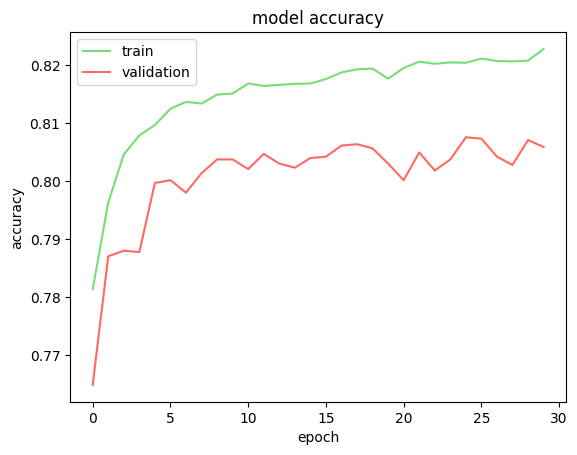

In [103]:
#Graph for Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

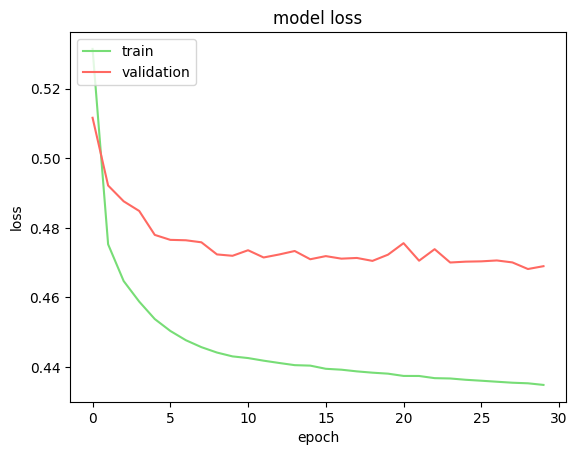

In [104]:
# Graph for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### <font color='Blue'>1.4 Model Validation</font>

<b> Step 1: Obtaining the Predicted Probablities </b>

In [105]:
pred_probs=model.predict(X_test)
predicted_prob=pd.DataFrame(pred_probs)
y_actual = (y_test.reset_index())['def_pay']
y_pred_df = pd.DataFrame( { "actual": y_actual, "predicted_prob":predicted_prob[0] } )

281/281 [==============================] - 0s 1ms/step


<b> Step 2: Plotting the RoC Curve </b>

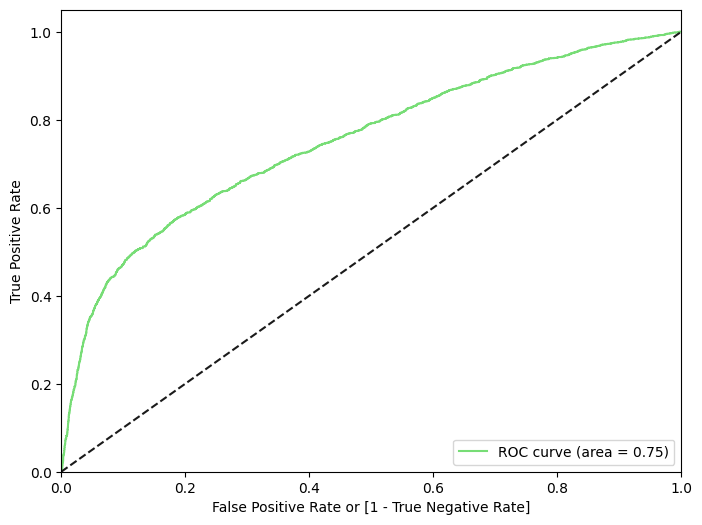

auc_score: 0.7503


In [106]:
fpr, tpr, thresholds = draw_roc( y_pred_df.actual, y_pred_df.predicted_prob)

auc_score = metrics.roc_auc_score( y_pred_df.actual, y_pred_df.predicted_prob )
print("auc_score:", round( float( auc_score ), 4 ))

<b> Step 3: Confusion Matrix </b>

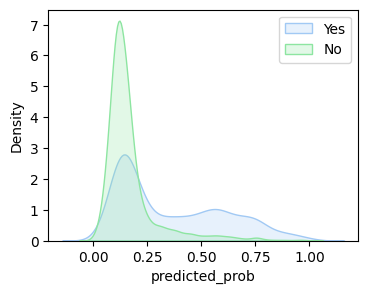

In [107]:
plt.figure( figsize = (4,3) )
sn.kdeplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], color = 'b', shade=True,label = 'Yes' )
sn.kdeplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], color = 'g', shade=True,label = 'No' )
plt.legend()
plt.show()

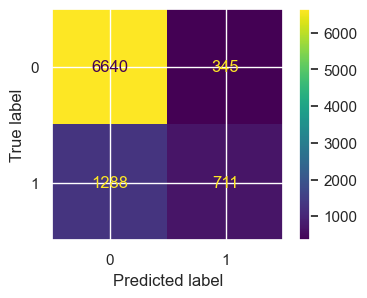

In [108]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

sn.set(rc = {'figure.figsize':(4,3)})
y_pred_df['predicted'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.45 else 0)
cm = confusion_matrix(y_pred_df.actual, y_pred_df.predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm )
                      
disp.plot()
plt.show()

#### <font color='Green'>Peformance Measures</font>

In [109]:
print( metrics.classification_report( y_pred_df.actual, y_pred_df.predicted ) )

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      6985
           1       0.67      0.36      0.47      1999

    accuracy                           0.82      8984
   macro avg       0.76      0.65      0.68      8984
weighted avg       0.80      0.82      0.80      8984



### <font color='Blue'>1.2 Hyperparameter Tuning - Random Search</font>

#### <font color='Green'>STEP 1.2.1: Defining the Architecture</font>

In [110]:
K.clear_session()

In [111]:
def create_model(unit):
    model = Sequential()
    model.add(Dense(unit, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [112]:
model = KerasClassifier(build_fn=create_model, verbose=1)

#### <font color='Green'>STEP 1.2.3: Defining Hyperparameters</font>

In [113]:
param_grid={'batch_size':[8, 16, 32], 
            'epochs':[15, 30, 45],
            'unit':[8, 12, 16]
           }

#### <font color='Green'>STEP 1.2.4: Executing Random Search</font>

In [114]:
early_stopping = EarlyStopping(monitor='loss', patience=5)

In [115]:
rand_model = RandomizedSearchCV(estimator=model, param_distributions = param_grid , n_jobs=-1, cv=4)

In [116]:
rand_result = rand_model.fit(X_train, y_train,callbacks=[early_stopping],validation_split=0.2)

Epoch 1/45
525/525 [==============================] - 3s 3ms/step - loss: 0.5620 - accuracy: 0.7482 - val_loss: 0.5245 - val_accuracy: 0.7632
Epoch 2/45
525/525 [==============================] - 1s 3ms/step - loss: 0.4807 - accuracy: 0.7914 - val_loss: 0.4934 - val_accuracy: 0.7854
Epoch 3/45
525/525 [==============================] - 1s 3ms/step - loss: 0.4659 - accuracy: 0.8024 - val_loss: 0.4868 - val_accuracy: 0.7896
Epoch 4/45
525/525 [==============================] - 1s 2ms/step - loss: 0.4595 - accuracy: 0.8064 - val_loss: 0.4821 - val_accuracy: 0.7982
Epoch 5/45
525/525 [==============================] - 1s 2ms/step - loss: 0.4547 - accuracy: 0.8089 - val_loss: 0.4805 - val_accuracy: 0.7961
Epoch 6/45
525/525 [==============================] - 1s 3ms/step - loss: 0.4516 - accuracy: 0.8107 - val_loss: 0.4778 - val_accuracy: 0.7978
Epoch 7/45
525/525 [==============================] - 1s 3ms/step - loss: 0.4490 - accuracy: 0.8115 - val_loss: 0.4762 - val_accuracy: 0.7990
Epoch 

In [117]:
results_df = pd.DataFrame(rand_result.cv_results_)
results_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_unit  \
0      32.210695      0.640349         0.731899        0.080759         16   
1      55.678805      1.055349         1.323632        0.042584          8   
2      65.204190      1.171494         1.414774        0.166746         16   
3      36.310436      0.938763         0.797670        0.089162         12   
4      72.185025      0.786694         0.817179        0.079956         12   

  param_epochs param_batch_size                                        params  \
0           15               16  {'unit': 16, 'epochs': 15, 'batch_size': 16}   
1           15                8    {'unit': 8, 'epochs': 15, 'batch_size': 8}   
2           15                8   {'unit': 16, 'epochs': 15, 'batch_size': 8}   
3           15               16  {'unit': 12, 'epochs': 15, 'batch_size': 16}   
4           30               16  {'unit': 12, 'epochs': 30, 'batch_size': 16}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.809388           0.813204           0.832252           0.804580   
1           0.804999           0.816447           0.827863           0.808397   
2           0.802137           0.817401           0.833969           0.810305   
3           0.795459           0.810532           0.830534           0.808779   
4           0.810151           0.811868           0.833397           0.813550   

   mean_test_score  std_test_score  rank_test_score  
0         0.814856        0.010498                8  
1         0.814426        0.008801                9  
2         0.815953        0.011720                6  
3         0.811326        0.012528               10  
4         0.817241        0.009405                4

#### <font color='Green'>STEP 1.2.5: Obtaining Best Hyper Parameters</font>

In [118]:
rand_result.best_score_

0.8177180141210556

In [119]:
rand_result.best_params_

{'unit': 12, 'epochs': 45, 'batch_size': 32}

#### <font color='Green'>STEP 1.2.6: Print Results</font>

In [120]:
means = rand_result.cv_results_['mean_test_score']
params = rand_result.cv_results_['params']
for mean, params in zip(means, params):
    print("Score: %f Hyperparameters: %r " % (mean, params))

Score: 0.814856 Hyperparameters: {'unit': 16, 'epochs': 15, 'batch_size': 16} 
Score: 0.814426 Hyperparameters: {'unit': 8, 'epochs': 15, 'batch_size': 8} 
Score: 0.815953 Hyperparameters: {'unit': 16, 'epochs': 15, 'batch_size': 8} 
Score: 0.811326 Hyperparameters: {'unit': 12, 'epochs': 15, 'batch_size': 16} 
Score: 0.817241 Hyperparameters: {'unit': 12, 'epochs': 30, 'batch_size': 16} 
Score: 0.817480 Hyperparameters: {'unit': 16, 'epochs': 45, 'batch_size': 8} 
Score: 0.817718 Hyperparameters: {'unit': 12, 'epochs': 45, 'batch_size': 32} 
Score: 0.817193 Hyperparameters: {'unit': 8, 'epochs': 45, 'batch_size': 32} 
Score: 0.817623 Hyperparameters: {'unit': 16, 'epochs': 30, 'batch_size': 32} 
Score: 0.815524 Hyperparameters: {'unit': 12, 'epochs': 30, 'batch_size': 32} 


### <font color='Blue'>1.3 Model Building with Identified Hyperparameters</font>

In [121]:
K.clear_session()

model = Sequential()
model.add(Dense(8, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=30, batch_size=8, validation_split=0.2, verbose=1)

Epoch 1/30
2097/2097 [==============================] - 5s 2ms/step - loss: 0.5089 - accuracy: 0.7815 - val_loss: 0.5052 - val_accuracy: 0.7639
Epoch 2/30
2097/2097 [==============================] - 5s 2ms/step - loss: 0.4732 - accuracy: 0.7936 - val_loss: 0.4887 - val_accuracy: 0.7930
Epoch 3/30
2097/2097 [==============================] - 4s 2ms/step - loss: 0.4609 - accuracy: 0.8069 - val_loss: 0.4806 - val_accuracy: 0.8006
Epoch 4/30
2097/2097 [==============================] - 4s 2ms/step - loss: 0.4539 - accuracy: 0.8103 - val_loss: 0.4798 - val_accuracy: 0.7970
Epoch 5/30
2097/2097 [==============================] - 5s 2ms/step - loss: 0.4500 - accuracy: 0.8131 - val_loss: 0.4741 - val_accuracy: 0.8030
Epoch 6/30
2097/2097 [==============================] - 5s 2ms/step - loss: 0.4475 - accuracy: 0.8142 - val_loss: 0.4817 - val_accuracy: 0.7935
Epoch 7/30
2097/2097 [==============================] - 4s 2ms/step - loss: 0.4464 - accuracy: 0.8127 - val_loss: 0.4717 - val_accuracy:

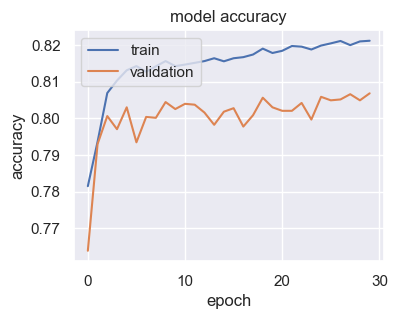

In [122]:
#Graph for Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

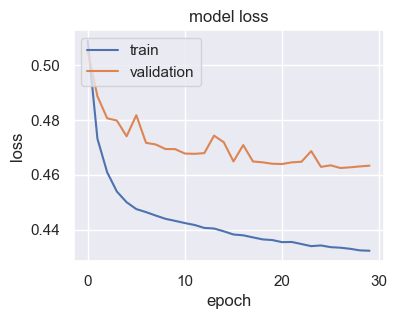

In [123]:
# Graph for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### <font color='Blue'>1.4 Model Validation</font>

<b> Step 1: Obtaining the Predicted Probablities </b>

In [124]:
pred_probs=model.predict(X_test)
predicted_prob=pd.DataFrame(pred_probs)
y_actual = (y_test.reset_index())['def_pay']
y_pred_df = pd.DataFrame( { "actual": y_actual, "predicted_prob":predicted_prob[0] } )

281/281 [==============================] - 0s 1ms/step


<b> Step 2: Plotting the RoC Curve </b>

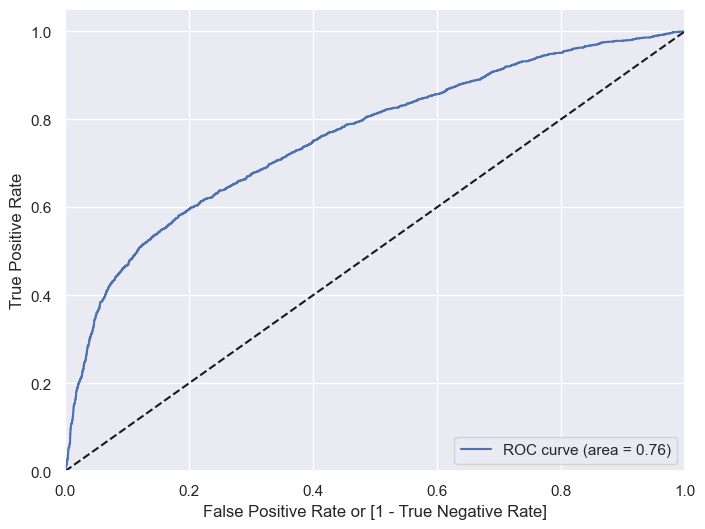

auc_score: 0.7589


In [125]:
fpr, tpr, thresholds = draw_roc( y_pred_df.actual, y_pred_df.predicted_prob)

auc_score = metrics.roc_auc_score( y_pred_df.actual, y_pred_df.predicted_prob )
print("auc_score:", round( float( auc_score ), 4 ))

<b> Step 3: Confusion Matrix </b>

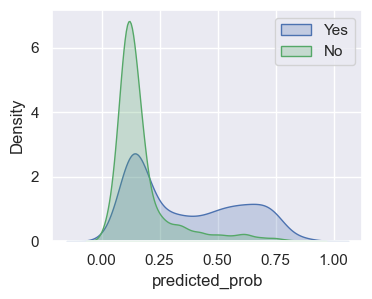

In [126]:
plt.figure( figsize = (4,3) )
sn.kdeplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], color = 'b', shade=True,label = 'Yes' )
sn.kdeplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], color = 'g', shade=True,label = 'No' )
plt.legend()
plt.show()

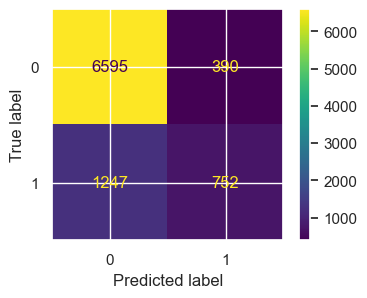

In [127]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

sn.set(rc = {'figure.figsize':(4,3)})
y_pred_df['predicted'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.45 else 0)
cm = confusion_matrix(y_pred_df.actual, y_pred_df.predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm )
                      
disp.plot()
plt.show()

#### <font color='Green'>Peformance Measures</font>

In [128]:
print( metrics.classification_report( y_pred_df.actual, y_pred_df.predicted ) )

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      6985
           1       0.66      0.38      0.48      1999

    accuracy                           0.82      8984
   macro avg       0.75      0.66      0.68      8984
weighted avg       0.80      0.82      0.80      8984



### <font color='Blue'>1.2 Hyperparameter Tuning - Bayesian Optimization</font>

#### <font color='Green'>STEP 1.2.1: Defining the Model with Hyperparameter Choices</font>

In [129]:
K.clear_session()

In [130]:
def create_model(hp):
     model = Sequential()
     model.add(Dense(units=hp.Int('units',min_value=8, max_value=64, step=8), 
                     input_shape=(X_train.shape[1],), 
                     activation=hp.Choice('activation',values=['sigmoid','relu'])))
     model.add(Dropout(0.05))
     model.add(Dense(1, activation='sigmoid'))
     model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
     return model                                   

#### <font color='Green'>STEP 1.2.2: Defining the Optimizer</font>

In [131]:
bayesian_tuner = BayesianOptimization(create_model, objective='accuracy',max_trials=5,
                                      directory=os.path.normpath('C:/Users/Public/'),
                                      project_name='kerastuner_bayesian',
                                      overwrite=True)

#### <font color='Green'>STEP 1.2.3: Executing Bayesian Optimization</font>

In [132]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
bayesian_tuner.search(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2,verbose=1,callbacks=[early_stopping])

Trial 5 Complete [00h 01m 11s]
accuracy: 0.8209791779518127

Best accuracy So Far: 0.8237223625183105
Total elapsed time: 00h 06m 02s


#### <font color='Green'>STEP 1.2.4: Obtaining Best HyperParameters</font>

In [133]:
best_hp = bayesian_tuner.get_best_hyperparameters(num_trials = 1)[0]   

In [134]:
best_hp.get('units')

40

In [135]:
best_hp.get('activation')

'relu'

### <font color='Blue'>1.3 Building Models with Identified Hyperparameters</font>

In [136]:
K.clear_session()

model = Sequential()
model.add(Dense(56, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1, validation_split=0.2)

Epoch 1/20
1049/1049 [==============================] - 3s 2ms/step - loss: 0.4960 - accuracy: 0.7884 - val_loss: 0.4916 - val_accuracy: 0.7861
Epoch 2/20
1049/1049 [==============================] - 3s 3ms/step - loss: 0.4624 - accuracy: 0.8072 - val_loss: 0.4797 - val_accuracy: 0.7963
Epoch 3/20
1049/1049 [==============================] - 3s 3ms/step - loss: 0.4526 - accuracy: 0.8091 - val_loss: 0.4746 - val_accuracy: 0.8028
Epoch 4/20
1049/1049 [==============================] - 3s 3ms/step - loss: 0.4486 - accuracy: 0.8120 - val_loss: 0.4726 - val_accuracy: 0.8021
Epoch 5/20
1049/1049 [==============================] - 3s 3ms/step - loss: 0.4461 - accuracy: 0.8151 - val_loss: 0.4846 - val_accuracy: 0.7920
Epoch 6/20
1049/1049 [==============================] - 3s 3ms/step - loss: 0.4450 - accuracy: 0.8148 - val_loss: 0.4746 - val_accuracy: 0.8013
Epoch 7/20
1049/1049 [==============================] - 3s 2ms/step - loss: 0.4430 - accuracy: 0.8147 - val_loss: 0.4726 - val_accuracy:

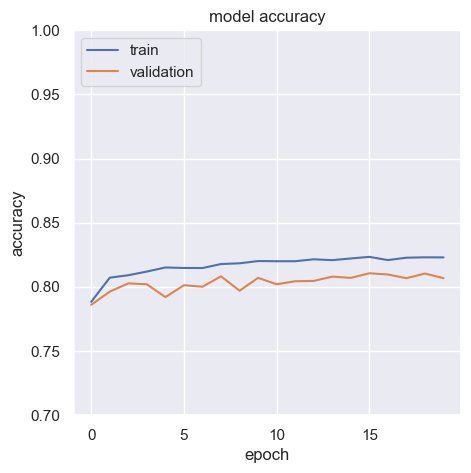

In [137]:
#Graph for Accuracy
sn.set(rc = {'figure.figsize':(5,5)})
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylim(0.7,1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

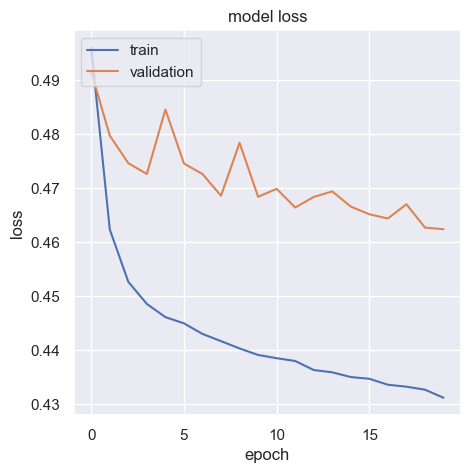

In [138]:
# Graph for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### <font color='Blue'>1.4 Model Validation</font>

<b> Step 1: Obtaining the Predicted Probablities </b>

In [139]:
pred_probs=model.predict(X_test)
predicted_prob=pd.DataFrame(pred_probs)
y_actual = (y_test.reset_index())['def_pay']
y_pred_df = pd.DataFrame( { "actual": y_actual, "predicted_prob":predicted_prob[0] } )

281/281 [==============================] - 0s 1ms/step


<b> Step 2: Plotting the RoC Curve </b>

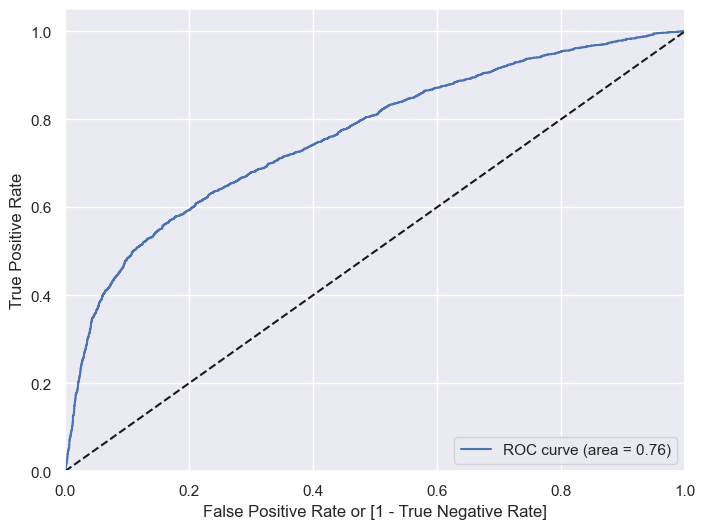

auc_score: 0.7621


In [140]:
fpr, tpr, thresholds = draw_roc( y_pred_df.actual, y_pred_df.predicted_prob)

auc_score = metrics.roc_auc_score( y_pred_df.actual, y_pred_df.predicted_prob )
print("auc_score:", round( float( auc_score ), 4 ))

<b> Step 3: Confusion Matrix </b>

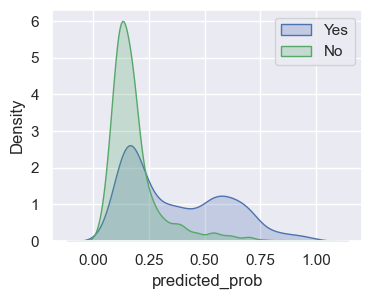

In [141]:
plt.figure( figsize = (4,3) )
sn.kdeplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], color = 'b', shade=True,label = 'Yes' )
sn.kdeplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], color = 'g', shade=True,label = 'No' )
plt.legend()
plt.show()

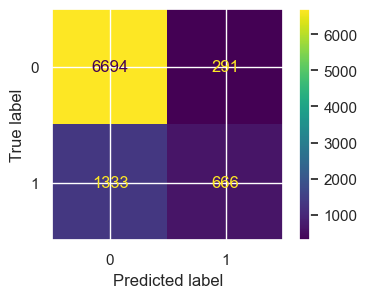

In [142]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

sn.set(rc = {'figure.figsize':(4,3)})
y_pred_df['predicted'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.5 else 0)
cm = confusion_matrix(y_pred_df.actual, y_pred_df.predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm )
                      
disp.plot()
plt.show()

#### <font color='Green'>Peformance Measures</font>

In [143]:
print( metrics.classification_report( y_pred_df.actual, y_pred_df.predicted ) )

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      6985
           1       0.70      0.33      0.45      1999

    accuracy                           0.82      8984
   macro avg       0.76      0.65      0.67      8984
weighted avg       0.80      0.82      0.79      8984



### <font color='Blue'>1.2 Hyperparameter Tuning - Hyperband Optimization</font>

#### <font color='Green'>STEP 1.2.1: Defining the Model with Hyperparameter Choices</font>

In [144]:
K.clear_session()

In [145]:
def create_model(hp):
     model = Sequential()
     model.add(Dense(units=hp.Int('units',min_value=8, max_value=64, step=8), 
                     input_shape=(X_train.shape[1],), 
                     activation=hp.Choice('activation',values=['sigmoid','relu'])))
     model.add(Dropout(0.05))
     model.add(Dense(1, activation='sigmoid'))
     model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
     return model                                   

#### <font color='Green'>STEP 1.2.2: Defining the Optimizer</font>

In [146]:
hyperband_tuner = Hyperband(
    create_model,
    objective='accuracy', 
    max_epochs=300,
    hyperband_iterations = 3,
    factor = 10,
    directory=os.path.normpath('C:/Users/Public/'),
    project_name='kerastuner_hyperband',
    overwrite=True)

#### <font color='Green'>STEP 1.2.3: Executing Hyperband Optimization</font>

In [147]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
hyperband_tuner.search(X_train, y_train, batch_size=16, validation_split=0.2,verbose=1,callbacks=[early_stopping])

Trial 16 Complete [00h 00m 09s]
accuracy: 0.8110799789428711

Best accuracy So Far: 0.8117359280586243
Total elapsed time: 00h 02m 14s


In [148]:
hyperband_tuner.results_summary()

Results summary
Results in C:\Users\Public\kerastuner_hyperband
Showing 10 best trials
Objective(name="accuracy", direction="max")

Trial 0004 summary
Hyperparameters:
units: 64
activation: relu
tuner/epochs: 3
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 0.8117359280586243

Trial 0011 summary
Hyperparameters:
units: 48
activation: relu
tuner/epochs: 3
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 0.8113781213760376

Trial 0015 summary
Hyperparameters:
units: 56
activation: relu
tuner/epochs: 3
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 0.8110799789428711

Trial 0014 summary
Hyperparameters:
units: 40
activation: relu
tuner/epochs: 3
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 0.8103047013282776

Trial 0000 summary
Hyperparameters:
units: 24
activation: relu
tuner/epochs: 3
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 0.8094698786735535

Trial 0008 summary
Hyperparameters:
units: 32
activation: relu


#### <font color='Green'>STEP 1.2.4: Obtaining Best HyperParameters</font>

In [149]:
best_hp = hyperband_tuner.get_best_hyperparameters(num_trials = 1)[0]

In [150]:
best_hp.get('units')

64

In [151]:
best_hp.get('activation')

'relu'

### <font color='Blue'>1.3 Building Models with Identified Hyperparameters</font>

In [152]:
K.clear_session()

model = Sequential()
model.add(Dense(56, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1, validation_split=0.2)

Epoch 1/20
1049/1049 [==============================] - 3s 2ms/step - loss: 0.4930 - accuracy: 0.7902 - val_loss: 0.4894 - val_accuracy: 0.7892
Epoch 2/20
1049/1049 [==============================] - 2s 2ms/step - loss: 0.4611 - accuracy: 0.8067 - val_loss: 0.4804 - val_accuracy: 0.8021
Epoch 3/20
1049/1049 [==============================] - 2s 2ms/step - loss: 0.4520 - accuracy: 0.8115 - val_loss: 0.4774 - val_accuracy: 0.7968
Epoch 4/20
1049/1049 [==============================] - 3s 2ms/step - loss: 0.4480 - accuracy: 0.8143 - val_loss: 0.4734 - val_accuracy: 0.8028
Epoch 5/20
1049/1049 [==============================] - 2s 2ms/step - loss: 0.4467 - accuracy: 0.8128 - val_loss: 0.4786 - val_accuracy: 0.7992
Epoch 6/20
1049/1049 [==============================] - 2s 2ms/step - loss: 0.4440 - accuracy: 0.8147 - val_loss: 0.4731 - val_accuracy: 0.8035
Epoch 7/20
1049/1049 [==============================] - 2s 2ms/step - loss: 0.4436 - accuracy: 0.8145 - val_loss: 0.4758 - val_accuracy:

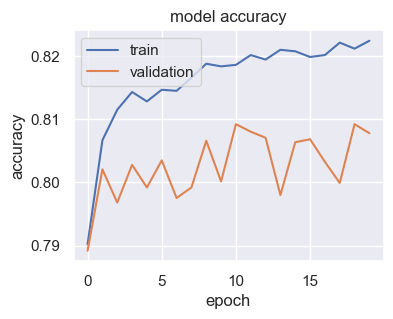

In [153]:
#Graph for Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

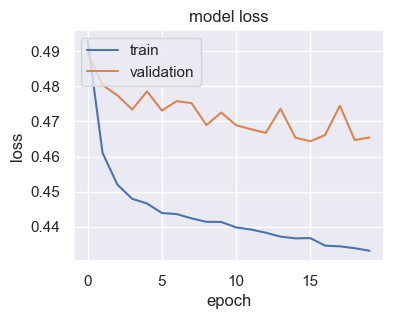

In [154]:
# Graph for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### <font color='Blue'>1.3 Model Validation</font>

<b> Step 1: Obtaining the Predicted Probablities </b>

In [155]:
pred_probs=model.predict(X_test)
predicted_prob=pd.DataFrame(pred_probs)
y_actual = (y_test.reset_index())['def_pay']
y_pred_df = pd.DataFrame( { "actual": y_actual, "predicted_prob":predicted_prob[0] } )

281/281 [==============================] - 0s 2ms/step


<b> Step 2: Plotting the RoC Curve </b>

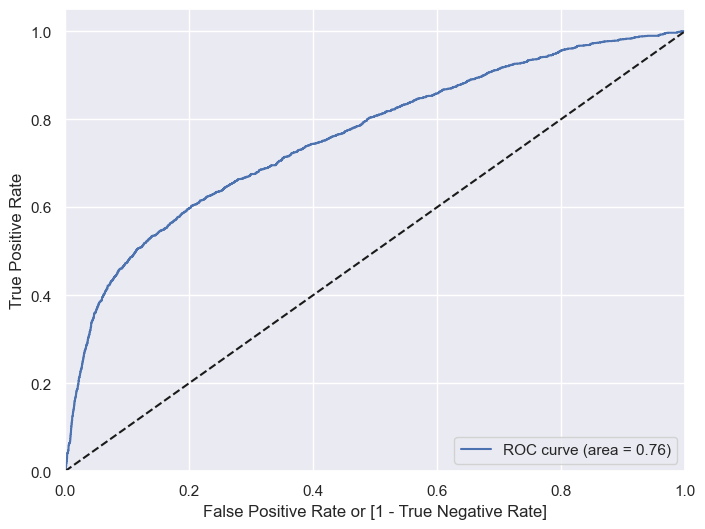

auc_score: 0.7594


In [156]:
fpr, tpr, thresholds = draw_roc( y_pred_df.actual, y_pred_df.predicted_prob)

auc_score = metrics.roc_auc_score( y_pred_df.actual, y_pred_df.predicted_prob )
print("auc_score:", round( float( auc_score ), 4 ))

<b> Step 3: Confusion Matrix </b>

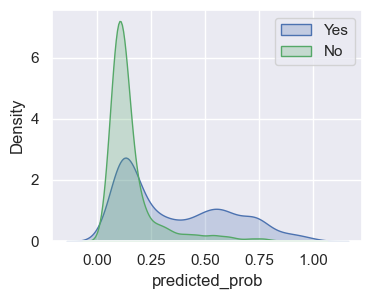

In [157]:
plt.figure( figsize = (4,3) )
sn.kdeplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], color = 'b', shade=True,label = 'Yes' )
sn.kdeplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], color = 'g', shade=True,label = 'No' )
plt.legend()
plt.show()

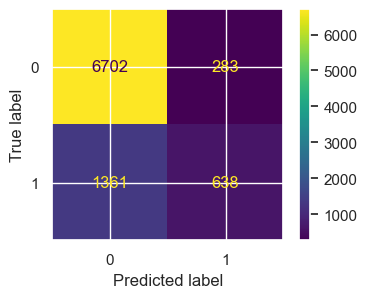

In [158]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

sn.set(rc = {'figure.figsize':(4,3)})
y_pred_df['predicted'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.5 else 0)
cm = confusion_matrix(y_pred_df.actual, y_pred_df.predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm )
                      
disp.plot()
plt.show()

In [159]:
#### <font color='Green'>Peformance Measures</font>

In [160]:
print( metrics.classification_report( y_pred_df.actual, y_pred_df.predicted ) )

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      6985
           1       0.69      0.32      0.44      1999

    accuracy                           0.82      8984
   macro avg       0.76      0.64      0.66      8984
weighted avg       0.80      0.82      0.79      8984



## <font color='Green'>Logistic Regression Model</font>


#### Adding a constant for Logistic model to work while using statmodels package

In [161]:
Y_log = data_df['def_pay']
X_log = sm.add_constant( encoded_data_df[X_features] )
X_log

const  LIMIT_BAL       AGE     PAY_1     PAY_2     PAY_3     PAY_4  \
0        1.0  -1.136673 -1.245496  1.794858  1.782567 -0.696976 -0.666976   
1        1.0  -0.366290 -1.028535 -0.875493  1.782567  0.138859  0.188557   
2        1.0  -0.597405 -0.160692  0.014624  0.111651  0.138859  0.188557   
3        1.0  -0.905558  0.164749  0.014624  0.111651  0.138859  0.188557   
4        1.0  -0.905558  2.334356 -0.875493  0.111651 -0.696976  0.188557   
...      ...        ...       ...       ...       ...       ...       ...   
29941    1.0   0.404092  0.381710  0.014624  0.111651  0.138859  0.188557   
29942    1.0  -0.135176  0.815631 -0.875493 -0.723807 -0.696976 -0.666976   
29943    1.0  -1.059635  0.164749  3.575091  2.618026  1.810529 -0.666976   
29944    1.0  -0.674443  0.598671  0.904741 -0.723807  0.138859  0.188557   
29945    1.0  -0.905558  1.141072  0.014624  0.111651  0.138859  0.188557   

          PAY_5     PAY_6  BILL_AMT1  ...  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
0     -1.530485 -1.486530  -0.642846  ... -0.296731 -0.308060 -0.314198   
1      0.234725  1.992476  -0.659553  ... -0.239971 -0.244274 -0.314198   
2      0.234725  0.252973  -0.299124  ... -0.239971 -0.244274 -0.248797   
3      0.234725  0.252973  -0.058209  ... -0.228619 -0.237896 -0.244285   
4      0.234725  0.252973  -0.579003  ...  0.270866  0.266010 -0.269137   
...         ...       ...        ...  ...       ...       ...       ...   
29941  0.234725  0.252973   1.868431  ... -0.012762 -0.113705  0.012805   
29942  0.234725  0.252973  -0.673111  ...  0.213993 -0.299831 -0.314198   
29943  0.234725  0.252973  -0.647569  ...  0.951982 -0.040160 -0.183397   
29944  0.234725 -0.616778  -0.718278  ... -0.229868 -0.185209  3.149675   
29945  0.234725  0.252973  -0.045465  ... -0.215564 -0.244274 -0.248797   

       PAY_AMT6  EDUCATION_HIGH_SCHOOL  EDUCATION_OTHERS  \
0     -0.293454                      0                 0   
1     -0.181038                      0                 0   
2     -0.012415                      0                 0   
3     -0.237246                      0                 0   
4     -0.255289                      0                 0   
...         ...                    ...               ...   
29941 -0.237246                      1                 0   
29942 -0.293454                      1                 0   
29943 -0.119210                      0                 0   
29944 -0.192055                      1                 0   
29945 -0.237246                      0                 0   

       EDUCATION_UNIVERSITY  MARRIAGE_OTHERS  MARRIAGE_SINGLE  SEX_MALE  
0                         1                0                0         0  
1                         1                0                1         0  
2                         1                0                1         0  
3                         1                0                0         0  
4                         1                0                0         1  
...                     ...              ...              ...       ...  
29941                     0                0                0         1  
29942                     0                0                1         1  
29943                     1                0                1         1  
29944                     0                0                0         1  
29945                     1                0                0         1  

[29946 rows x 27 columns]

#### <font color='Blue'> Splitting into Train and Validation Sets </font>

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X_log,Y_log,test_size = 0.3,random_state = 42)

#### <font color='Blue'> Building the logistic regression model </font>

In [163]:
logit = sm.Logit(y_train, X_train)
logit_model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.460993
         Iterations 8


#### <font color='Blue'> Printing Model Summary </font>

In [164]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                 Logit             Method:            MLE       
Dependent Variable:    def_pay           Pseudo R-squared:  0.129     
Date:                  2023-12-21 22:57  AIC:               19380.6790
No. Observations:      20962             BIC:               19595.3416
Df Model:              26                Log-Likelihood:    -9663.3   
Df Residuals:          20935             LL-Null:           -11096.   
Converged:             1.0000            LLR p-value:       0.0000    
No. Iterations:        8.0000            Scale:             1.0000    
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
const                 -1.3683   0.0440 -31.1173 0.0000 -1.4545 -1.2821
LIMIT_BAL             -0.0868   0.0247  -3.5126 0.0004 -0.1353 -0.0384
AGE                    0.0499   0.0206   2.4284 0.0152  0.0096  0.0902
PAY_1                  0.6774   0.0237  28.5979 0.0000  0.6310  0.7238
PAY_2                  0.1025   0.0287   3.5660 0.0004  0.0462  0.1589
PAY_3                  0.0805   0.0326   2.4736 0.0134  0.0167  0.1443
PAY_4                  0.0480   0.0351   1.3686 0.1711 -0.0208  0.1168
PAY_5                  0.0348   0.0365   0.9533 0.3404 -0.0368  0.1064
PAY_6                 -0.0275   0.0310  -0.8873 0.3749 -0.0882  0.0332
BILL_AMT1             -0.4747   0.1066  -4.4516 0.0000 -0.6836 -0.2657
BILL_AMT2              0.1831   0.1339   1.3671 0.1716 -0.0794  0.4456
BILL_AMT3              0.1655   0.1108   1.4932 0.1354 -0.0517  0.3828
BILL_AMT4              0.0011   0.1057   0.0106 0.9916 -0.2060  0.2082
BILL_AMT5              0.0805   0.1125   0.7156 0.4742 -0.1400  0.3010
BILL_AMT6             -0.0637   0.0861  -0.7399 0.4594 -0.2325  0.1051
PAY_AMT1              -0.2814   0.0500  -5.6235 0.0000 -0.3795 -0.1834
PAY_AMT2              -0.3069   0.0655  -4.6844 0.0000 -0.4353 -0.1785
PAY_AMT3              -0.0652   0.0397  -1.6428 0.1004 -0.1430  0.0126
PAY_AMT4              -0.0775   0.0369  -2.1014 0.0356 -0.1499 -0.0052
PAY_AMT5              -0.0298   0.0317  -0.9379 0.3483 -0.0919  0.0324
PAY_AMT6              -0.0559   0.0292  -1.9160 0.0554 -0.1131  0.0013
EDUCATION_HIGH_SCHOOL -0.1648   0.0574  -2.8694 0.0041 -0.2773 -0.0522
EDUCATION_OTHERS      -1.0608   0.2213  -4.7943 0.0000 -1.4945 -0.6271
EDUCATION_UNIVERSITY  -0.1119   0.0427  -2.6242 0.0087 -0.1955 -0.0283
MARRIAGE_OTHERS       -0.0645   0.1663  -0.3881 0.6979 -0.3905  0.2614
MARRIAGE_SINGLE       -0.1422   0.0417  -3.4102 0.0006 -0.2239 -0.0605
SEX_MALE               0.1170   0.0369   3.1699 0.0015  0.0446  0.1893
======================================================================

"""

### <font color='Blue'> Model Dignostics </font>

#### <font color='Blue'>Significant Variables </font>

In [165]:
def get_significant_vars( lm ):
    var_p_vals_df = pd.DataFrame( lm.pvalues )
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    return list( var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'] )

In [166]:
significant_vars = get_significant_vars( logit_model )
significant_vars

['const',
 'LIMIT_BAL',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'BILL_AMT1',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT4',
 'EDUCATION_HIGH_SCHOOL',
 'EDUCATION_OTHERS',
 'EDUCATION_UNIVERSITY',
 'MARRIAGE_SINGLE',
 'SEX_MALE']

### <font color='Blue'>Rebuilding the model with significant variables </font>

In [167]:
final_logit = sm.Logit( y_train, sm.add_constant( X_train[significant_vars] ) ).fit()

Optimization terminated successfully.
         Current function value: 0.461913
         Iterations 7


#### <font color='Blue'> Printing Model Summary </font>

In [168]:
final_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                 Logit             Method:            MLE       
Dependent Variable:    def_pay           Pseudo R-squared:  0.127     
Date:                  2023-12-21 22:57  AIC:               19395.2421
No. Observations:      20962             BIC:               19514.4991
Df Model:              14                Log-Likelihood:    -9682.6   
Df Residuals:          20947             LL-Null:           -11096.   
Converged:             1.0000            LLR p-value:       0.0000    
No. Iterations:        7.0000            Scale:             1.0000    
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
const                 -1.3547   0.0436 -31.1034 0.0000 -1.4401 -1.2693
LIMIT_BAL             -0.1053   0.0240  -4.3920 0.0000 -0.1523 -0.0583
AGE                    0.0510   0.0205   2.4876 0.0129  0.0108  0.0913
PAY_1                  0.6917   0.0235  29.4635 0.0000  0.6457  0.7378
PAY_2                  0.1001   0.0284   3.5231 0.0004  0.0444  0.1558
PAY_3                  0.1340   0.0265   5.0640 0.0000  0.0821  0.1859
BILL_AMT1             -0.1477   0.0241  -6.1371 0.0000 -0.1948 -0.1005
PAY_AMT1              -0.2398   0.0452  -5.3073 0.0000 -0.3283 -0.1512
PAY_AMT2              -0.2527   0.0568  -4.4478 0.0000 -0.3640 -0.1413
PAY_AMT4              -0.0945   0.0328  -2.8857 0.0039 -0.1587 -0.0303
EDUCATION_HIGH_SCHOOL -0.1685   0.0573  -2.9402 0.0033 -0.2809 -0.0562
EDUCATION_OTHERS      -1.0789   0.2208  -4.8857 0.0000 -1.5117 -0.6461
EDUCATION_UNIVERSITY  -0.1137   0.0426  -2.6711 0.0076 -0.1972 -0.0303
MARRIAGE_SINGLE       -0.1423   0.0415  -3.4297 0.0006 -0.2236 -0.0610
SEX_MALE               0.1138   0.0368   3.0875 0.0020  0.0415  0.1860
======================================================================

"""

#### <font color='Blue'>Extracting Predicted Probabilities </font>

In [169]:
y_pred_df = pd.DataFrame( { "actual": y_test, 
                            "predicted_prob": final_logit.predict(sm.add_constant( X_test[significant_vars] ) ) 
                          } )
y_pred_df.head(10)

actual  predicted_prob
23553       0        0.224467
5511        0        0.223787
13114       0        0.167725
20718       1        0.264988
20243       0        0.203457
18717       0        0.411267
8248        1        0.158560
19958       0        0.393926
6672        0        0.087302
25645       1        0.030971

#### <font color='Blue'>Classifier Performance </font>

<b> RoC Curve </b>

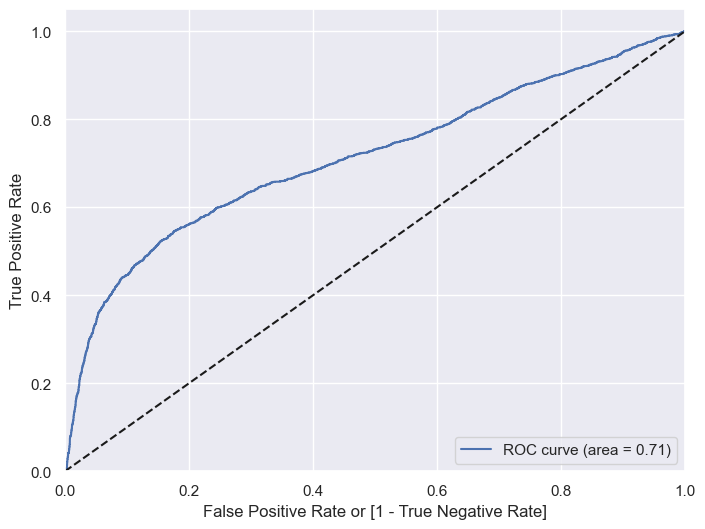

auc_score: 0.713


In [170]:
fpr, tpr, thresholds = draw_roc( y_pred_df.actual, y_pred_df.predicted_prob)

auc_score = metrics.roc_auc_score( y_pred_df.actual, y_pred_df.predicted_prob )
print("auc_score:", round( float( auc_score ), 3 ))

#### <font color='Blue'>Classifying based on default threshold = 0.5 </font>

In [171]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_pred_df.sample(10, random_state = 42)

actual  predicted_prob  predicted
5070        1        0.436339          0
6308        0        0.139241          0
22293       0        0.207153          0
18382       0        0.177081          0
6914        1        0.530160          1
15637       0        0.121183          0
22730       0        0.046404          0
17981       1        0.093906          0
29609       0        0.247869          0
11615       0        0.096141          0

#### <font color='Blue'>Confusion Matrix based on default threshold </font>

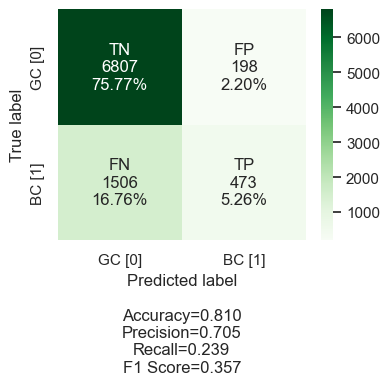

In [172]:
from confusion_matrix import make_confusion_matrix
cf_matrix = metrics.confusion_matrix(y_pred_df.actual, y_pred_df.predicted)
labels = ["TN","FP","FN","TP"]
categories = ["GC [0]","BC [1]"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Greens")

#### <font color='Blue'>Performance Measures from Confusion Matrix </font>

In [173]:
print( metrics.classification_report( y_pred_df.actual, y_pred_df.predicted ) )

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7005
           1       0.70      0.24      0.36      1979

    accuracy                           0.81      8984
   macro avg       0.76      0.61      0.62      8984
weighted avg       0.79      0.81      0.77      8984



#### <font color='Blue'>Choosing a better threshold </font>

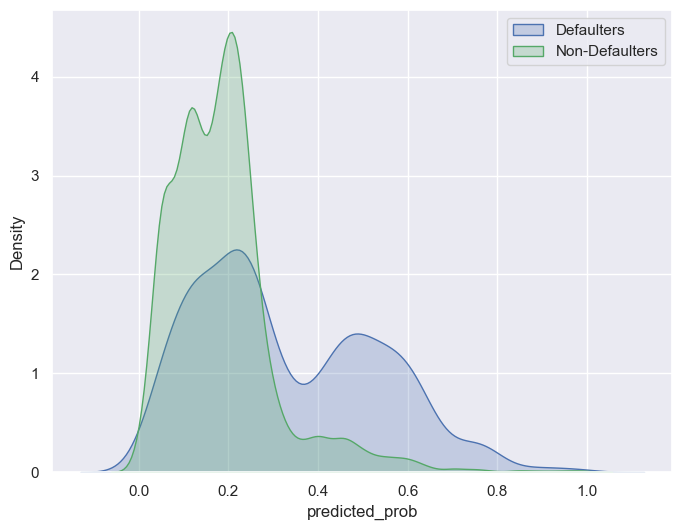

In [174]:
plt.figure( figsize = (8,6) )
sn.kdeplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], color = 'b', shade=True,label = 'Defaulters' )
sn.kdeplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], color = 'g', shade=True,label = 'Non-Defaulters' )
plt.legend()
plt.show()

### <font color='Blue'>Performance Measures from Confusion Matrix </font>

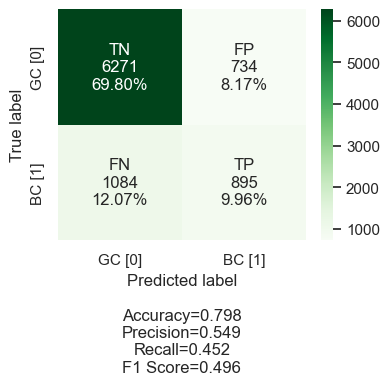

In [175]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.3 else 0)
from confusion_matrix import make_confusion_matrix
cf_matrix = metrics.confusion_matrix(y_pred_df.actual, y_pred_df.predicted)
labels = ["TN","FP","FN","TP"]
categories = ["GC [0]","BC [1]"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Greens")

In [176]:
print( metrics.classification_report( y_pred_df.actual, y_pred_df.predicted ) )

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      7005
           1       0.55      0.45      0.50      1979

    accuracy                           0.80      8984
   macro avg       0.70      0.67      0.68      8984
weighted avg       0.79      0.80      0.79      8984



## <font color='Blue'>2.0 Decision Tree Classifier</font>

CART - Classification and regresssion tree is a classification and regression algorithm which uses divide and conquer
strategy for classifying or regressing an outcome variable. The steps use in CART are


### <font color='Blue'>2.1 Splitting the dataset</font>

In [177]:
Y = data_df['def_pay']
X = encoded_data_df

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 42)

In [178]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20962 entries, 962 to 23654
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LIMIT_BAL              20962 non-null  float64
 1   AGE                    20962 non-null  float64
 2   PAY_1                  20962 non-null  float64
 3   PAY_2                  20962 non-null  float64
 4   PAY_3                  20962 non-null  float64
 5   PAY_4                  20962 non-null  float64
 6   PAY_5                  20962 non-null  float64
 7   PAY_6                  20962 non-null  float64
 8   BILL_AMT1              20962 non-null  float64
 9   BILL_AMT2              20962 non-null  float64
 10  BILL_AMT3              20962 non-null  float64
 11  BILL_AMT4              20962 non-null  float64
 12  BILL_AMT5              20962 non-null  float64
 13  BILL_AMT6              20962 non-null  float64
 14  PAY_AMT1               20962 non-null  float64
 15  PAY_A

In [179]:
Y

0        1
1        1
2        0
3        0
4        0
        ..
29941    0
29942    0
29943    1
29944    1
29945    1
Name: def_pay, Length: 29946, dtype: int64

### <font color='Blue'>2.2 Building the tree using Gini Criteria</font>

In [180]:
clf_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 2)
clf_tree.fit( X_train, y_train )
clf_tree

DecisionTreeClassifier(max_depth=2)

### <font color='Blue'>2.3 Extracting probabilities</font>

In [181]:
# Identifying optimal probability
tree_predict = clf_tree.predict_proba( X_test )
tree_predict = pd.DataFrame(tree_predict)[1]
tree_predict = tree_predict.to_numpy()

In [182]:
# Printing on Test Data
y_pred_df = pd.DataFrame( { "actual": y_test, 
                            "predicted_prob": tree_predict 
                          } )
y_pred_df.sample(10, random_state = 42)
#y_pred_df.shape

actual  predicted_prob
5070        1        0.415270
6308        0        0.141932
22293       0        0.141932
18382       0        0.141932
6914        1        0.712418
15637       0        0.141932
22730       0        0.141932
17981       1        0.141932
29609       0        0.141932
11615       0        0.141932

### <font color='Blue'>2.4 Classifier Performance </font>

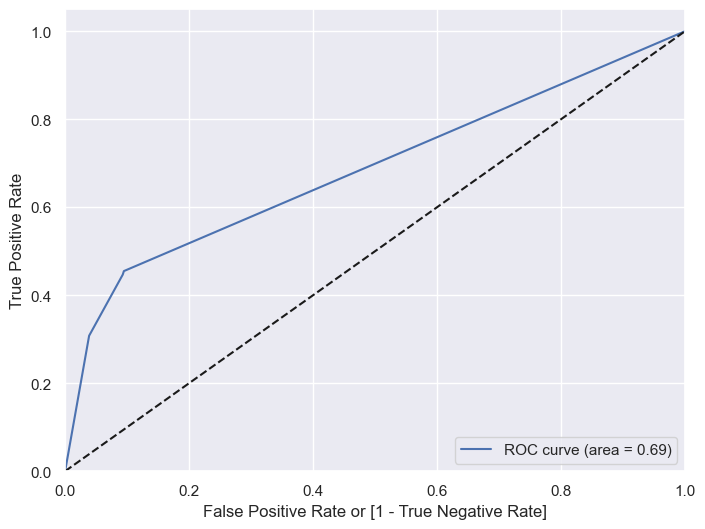

0.6856904708576382

In [183]:
# Plotting AUC 
fpr, tpr, thresholds = draw_roc( y_test, y_pred_df.predicted_prob)

# Measuring Test Accuracy
metrics.roc_auc_score( y_test, y_pred_df.predicted_prob)

### <font color='Blue'>2.5 Plotting Distributions and Identifying optimal probability</font>

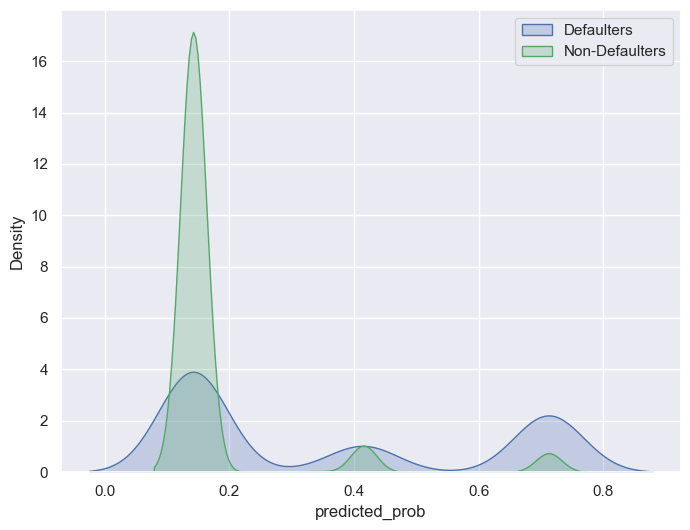

In [184]:
plt.figure( figsize = (8,6) )
sn.kdeplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], color = 'b', shade=True,label = 'Defaulters' )
sn.kdeplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], color = 'g', shade=True,label = 'Non-Defaulters' )
plt.legend()
plt.show()

### <font color='Blue'>2.6 Confusion Matrix and Peformance Measures</font>

Y Predicted
tree_predict
0    7420
1    1564
Name: count, dtype: int64

Y Actual
actual
0    7005
1    1979
Name: count, dtype: int64

confusion matrix
[[6341  664]
 [1079  900]]


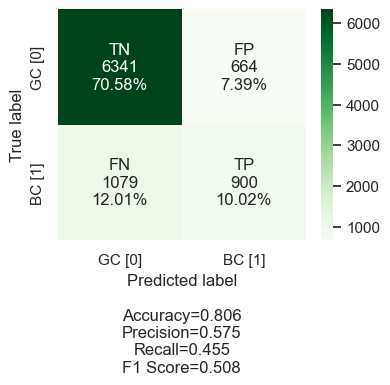

In [185]:
y_pred_df['tree_predict'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.18 else 0)

print("Y Predicted")
print(y_pred_df.tree_predict.value_counts())
print("")
print("Y Actual")
print(y_pred_df.actual.value_counts())
print("")
print("confusion matrix")
cm = metrics.confusion_matrix( y_pred_df.actual, y_pred_df.tree_predict )
print(cm)

from confusion_matrix import make_confusion_matrix
cf_matrix = metrics.confusion_matrix(y_pred_df.actual, y_pred_df.tree_predict)
labels = ["TN","FP","FN","TP"]
categories = ["GC [0]","BC [1]"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Greens")

In [186]:
print( metrics.classification_report( y_pred_df['actual'], y_pred_df['tree_predict'] ) )

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      7005
           1       0.58      0.45      0.51      1979

    accuracy                           0.81      8984
   macro avg       0.72      0.68      0.69      8984
weighted avg       0.79      0.81      0.80      8984



### <font color='Blue'>2.7 Displaying the Tree</font>

In [188]:
pip install pydotplus

  Using cached pydotplus-2.0.2-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [189]:
from sklearn.tree import export_graphviz
import pydotplus as pdot
from IPython.display import Image

# Export the tree into odt file
export_graphviz( clf_tree, out_file = "gp_chd_tree.odt", feature_names = X_train.columns, 
                 class_names= ['Non-Defaulters', 'Defaulters'], filled = True)

# Read the create the image file
chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'gp_chd_tree.odt' )
chd_tree_graph.write_jpg( 'gp_chd_tree.png' )

True

<b> Render the png file </b>

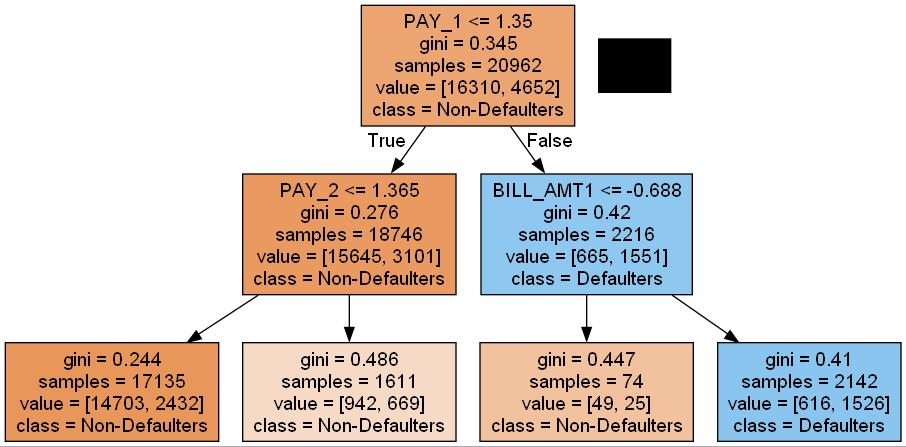

In [190]:
Image(filename='gp_chd_tree.png')

<b> Calculating GINI impurity of Node 1 </b>

In [191]:
gini_node_1 = 1 - pow(15645/18746, 2) - pow (3101/18746, 2)
print( round( gini_node_1, 4) )

0.2761


### <font color='Blue'>2.8 Building the tree using Entropy Criteria</font>

In [192]:
clf_tree_entropy = DecisionTreeClassifier( criterion = 'entropy',max_depth = 2 )
clf_tree_entropy.fit( X_train, y_train )

DecisionTreeClassifier(criterion='entropy', max_depth=2)

### <font color='Blue'>2.9 Displaying the tree</font>

In [193]:
# Export the tree into odt file
export_graphviz( clf_tree_entropy, out_file = "gp_chd_tree_entropy.odt", feature_names = X_train.columns, filled = True )

# Read the create the image file
chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'gp_chd_tree_entropy.odt' )
chd_tree_graph.write_jpg( 'gp_chd_tree_entropy.png' )

True

<b> Render the png file </b>

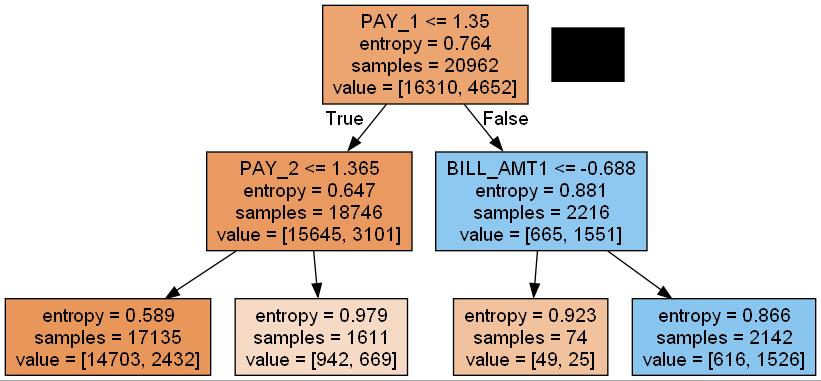

In [194]:
Image(filename='gp_chd_tree_entropy.png')

<b> Calculating Entropy of Node 1 </b>

In [195]:
import math
entropy_node_1 = - (15645/18746) * math.log2(15645/18746) - (3101/18746) * math.log2(3101/18746)
print( round( entropy_node_1, 2) )

0.65


### <font color='Blue'>2.10 Extracting probabilities</font>

In [196]:
tree_predict = clf_tree_entropy.predict_proba( X_test )
tree_predict = pd.DataFrame(tree_predict)[1]
tree_predict = tree_predict.to_numpy()

In [197]:
y_pred_df = pd.DataFrame( { "actual": y_test, 
                            "predicted_prob": tree_predict 
                          } )
y_pred_df.sample(10, random_state = 42)


actual  predicted_prob
5070        1        0.415270
6308        0        0.141932
22293       0        0.141932
18382       0        0.141932
6914        1        0.712418
15637       0        0.141932
22730       0        0.141932
17981       1        0.141932
29609       0        0.141932
11615       0        0.141932

### <font color='Blue'>2.11 Classifier Performance </font>

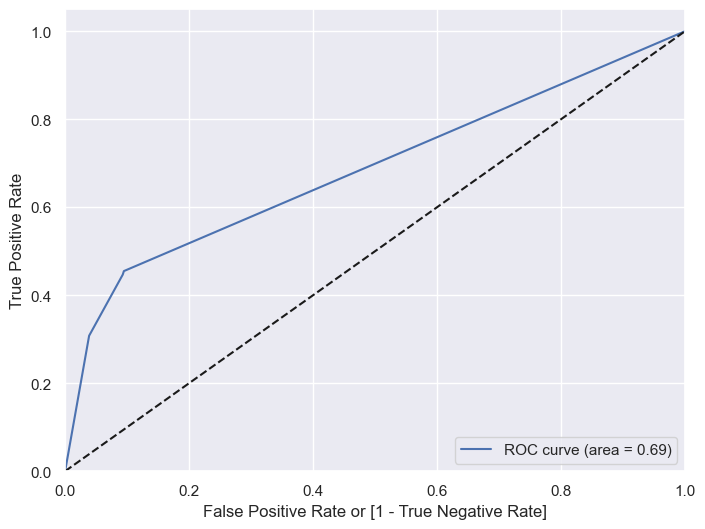

0.6856904708576382

In [198]:
# Plotting AUC 
fpr, tpr, thresholds = draw_roc( y_test, y_pred_df.predicted_prob)

# Measuring Test Accuracy
metrics.roc_auc_score( y_test, y_pred_df.predicted_prob)

### <font color='Blue'>2.12 Plotting Distributions and Identifying optimal probability</font>

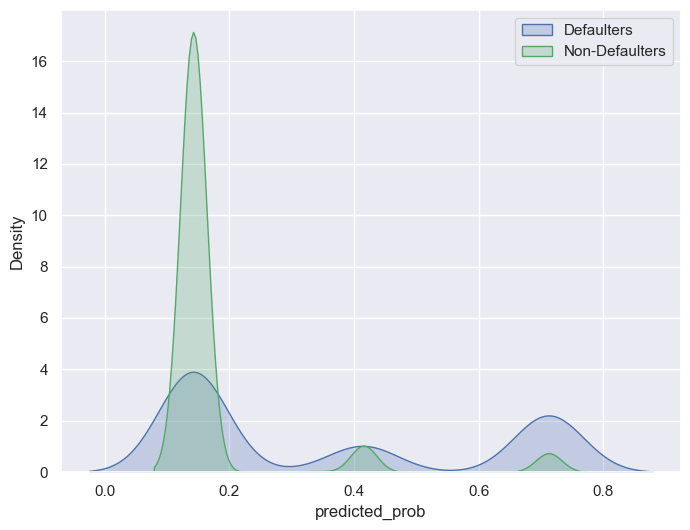

In [199]:
plt.figure( figsize = (8,6) )
sn.kdeplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], color = 'b', shade=True,label = 'Defaulters' )
sn.kdeplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], color = 'g', shade=True,label = 'Non-Defaulters' )
plt.legend()
plt.show()

### <font color='Blue'>2.13 Confusion Matrix and Peformance Measure</font>

In [200]:
y_pred_df['tree_predict'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.18 else 0)

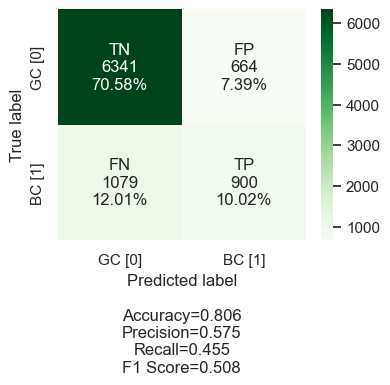

In [201]:
from confusion_matrix import make_confusion_matrix
cf_matrix = metrics.confusion_matrix(y_pred_df.actual, y_pred_df.tree_predict)
labels = ["TN","FP","FN","TP"]
categories = ["GC [0]","BC [1]"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Greens")


In [202]:
print( metrics.classification_report( y_pred_df['actual'], y_pred_df['tree_predict'] ) )

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      7005
           1       0.58      0.45      0.51      1979

    accuracy                           0.81      8984
   macro avg       0.72      0.68      0.69      8984
weighted avg       0.79      0.81      0.80      8984



### <font color='Blue'>2.14 Finding optimal criteria and max_depth</font>

In [203]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'criterion': ['gini','entropy'],'max_depth': range(2,10)}]

clf_tree = DecisionTreeClassifier()
clf = GridSearchCV(clf_tree,tuned_parameters,cv=10,scoring='roc_auc')
clf.fit(X_train, y_train )

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             scoring='roc_auc')

In [204]:
clf.best_score_

0.7650258163491463

In [205]:
clf.best_params_

{'criterion': 'entropy', 'max_depth': 6}

### <font color='Blue'>2.15 Re-Building the tree using Entropy Criteria and Depth 6</font>

In [206]:
clf_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6)
clf_tree.fit( X_train, y_train )

DecisionTreeClassifier(criterion='entropy', max_depth=6)

### <font color='Blue'>2.16 Extracting probabilities</font>

In [207]:
tree_predict = clf_tree.predict_proba( X_test )
tree_predict = pd.DataFrame(tree_predict)[1]
tree_predict = tree_predict.to_numpy()

In [208]:
y_pred_df = pd.DataFrame( { "actual": y_test, 
                            "predicted_prob": tree_predict 
                          } )
y_pred_df.sample(10, random_state = 42)


actual  predicted_prob
5070        1        0.408271
6308        0        0.052035
22293       0        0.121332
18382       0        0.121332
6914        1        0.720482
15637       0        0.121332
22730       0        0.159046
17981       1        0.108191
29609       0        0.121332
11615       0        0.087193

### <font color='Blue'>2.17 Classifier Performance </font>

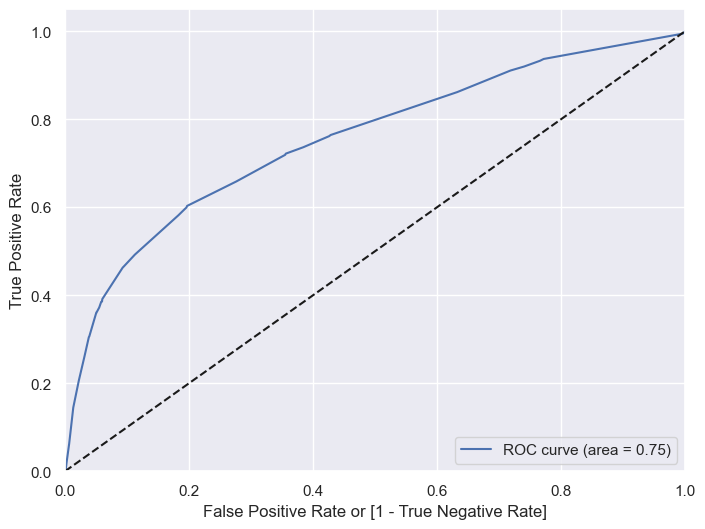

0.7541296749344203

In [209]:
fpr, tpr, thresholds = draw_roc( y_test, y_pred_df.predicted_prob)

# Measuring Test Accuracy
metrics.roc_auc_score( y_test, y_pred_df.predicted_prob)

### <font color='Blue'>2.18 Plotting Distributions and Identifying optimal probability</font>

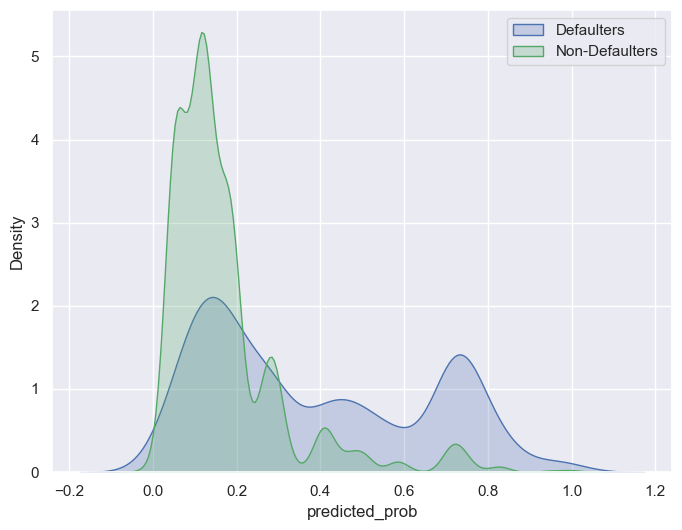

In [210]:
plt.figure( figsize = (8,6) )
sn.kdeplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], color = 'b', shade=True,label = 'Defaulters' )
sn.kdeplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], color = 'g', shade=True,label = 'Non-Defaulters' )
plt.legend()
plt.show()

### <font color='Blue'>2.19 Confusion Matrix and Peformance Measure</font>

In [211]:
y_pred_df['tree_predict'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.22 else 0)

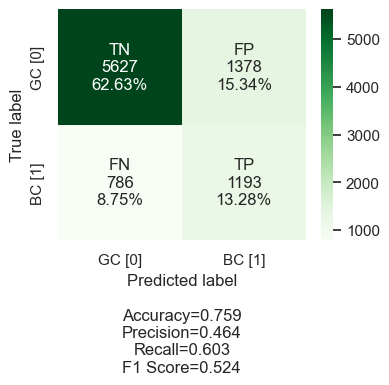

In [212]:
from confusion_matrix import make_confusion_matrix
cf_matrix = metrics.confusion_matrix(y_pred_df.actual, y_pred_df.tree_predict)
labels = ["TN","FP","FN","TP"]
categories = ["GC [0]","BC [1]"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Greens")

In [213]:
print( metrics.classification_report( y_pred_df['actual'], y_pred_df['tree_predict'] ) )

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      7005
           1       0.46      0.60      0.52      1979

    accuracy                           0.76      8984
   macro avg       0.67      0.70      0.68      8984
weighted avg       0.79      0.76      0.77      8984



### <font color='Blue'>2.20 Displaying the tree</font>

In [214]:
# Export the tree into odt file
export_graphviz( clf_tree, out_file = "gp_chd_tree.odt", feature_names = X_train.columns, 
                 class_names= ['Non-Defaulters', 'Defaulters'], filled = True)

# Read the create the image file
chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'gp_chd_tree.odt' )
chd_tree_graph.write_jpg( 'gp_chd_tree.png' )

True

<b> Render the png file </b>

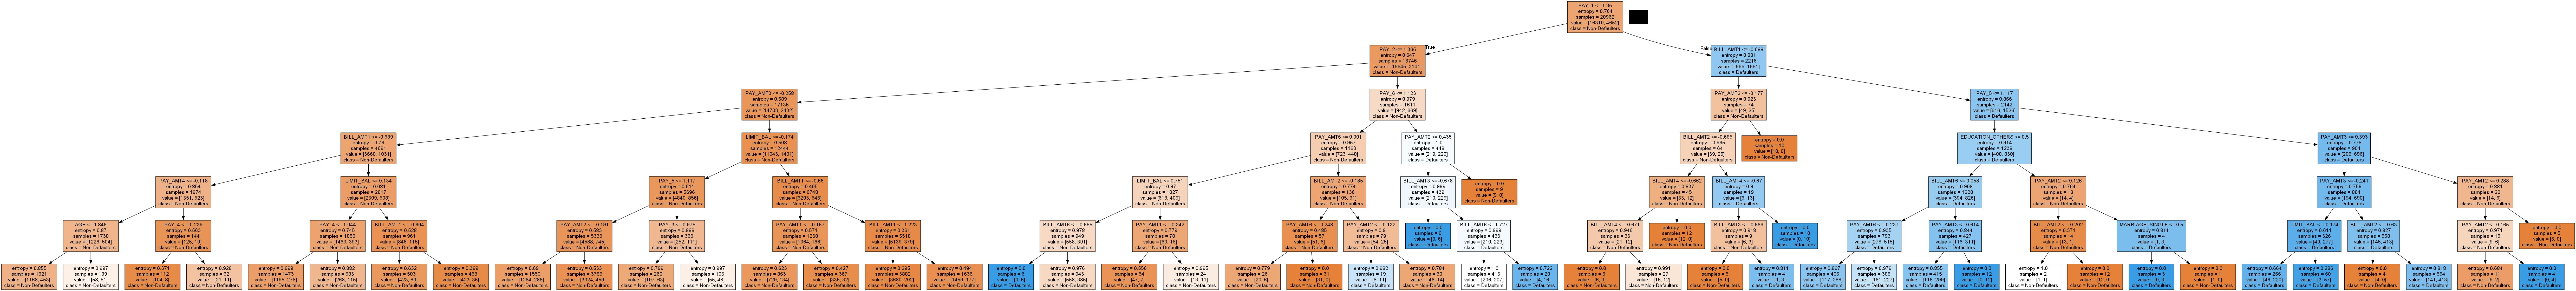

In [215]:
Image(filename='gp_chd_tree.png')